# <center>Drafting New Talent for SF Giants 2023 Season</center>
## <center>Linear Regression of MLB teams' percentage of wins from the last 5 regular seasons</center>

![close-up of a worn baseball on a lush green field](https://www.alumni.creighton.edu/s/1250/images/editor/alumni_site/emails/baseball_in_grass_cover_2.jpg)

<a id='Table_of_Contents'></a>
# Table of Contents
Each header has it's own link to return here, to the Table of Contents, so you can quickly navigate and jump around the notebook. 

1. [Introduction](#Introduction)
2. [Business Understanding](#Business_Understanding)
3. [Overview of Repository](#Overview_of_notebooks_contained_in_this_repository)
    1. [Notebook descriptions](#Sourcing_Data)
        1. [Web Scraping Player Stats](#Web_Scraping_Player_Stats)
            1. [Division I Collegiate Player Stats](#D1)
            2. [Triple-A Minor League Player Stats](#TripleA)
            3. [MLB Player Stats](#MLB_Players)
        2. [Web Scraping Game Stats](#Web_Scraping_Game_Stats)
            1. [MLB Game Stats](#Game_Stats)
        3. [Creating Team Stats](#Creating_Team_Stats)
            1. [MLB Team Stats](#MLB_team_stats)
    2. [Visual overview of notebooks](#visual_notebook_overview)
        1. [Overview of all notebooks within repository](#visual_all)
        2. [Breakdown of TRAIN and UTILIZE steps](#train_utilize)
            1. [Overview of the model training process](#visual_train_overview)
            2. [Overview of the model utilization process](#visual_utilize_overview)
4. [Notebook Setup](#Notebook_Setup)
    1. [Imports](#Imports)
    2. [Functions](#Functions)
        1. [Visualization functions](#Visualization_functions)
            1. [`hist_grid`](#hist_grid)
            2. [`boxplots`](#boxplots)
            3. [`hist_overlay`](#hist_overlay)
            4. [`regplot_grid`](#regplot_grid)
            5. [`heatmap`](#heatmap)
            6. [`remove_outliers`](#remove_outliers)
            7. [`print_outliers`](#print_outliers)
        2. [Modeling functions](#Modeling_functions)
            1. [`fit_model`](#fit_model)
            2. [`model_it_small`](#model_it_small)
            3. [`collinearity_pairs`](#collinearity_pairs)
            4. [`get_VIFs_above5`](#get_VIFs_above5)
            5. [`coeffs_to_df`](#coeffs_to_df)
            6. [`normality_check`](#normality_check)
            7. [`combine`](#combine)
            8. [`build_models`](#build_models)
            9. [`model_plus_one`](#model_plus_one)
5. [Data Understanding](#Data_Understanding)
    1. [Load raw data](#Load_raw_data)
6. [Exploratory Data Analysis of Raw Data](#EDA_raw)
    1. [Drop unnecessary columns](#EDA_raw_drop)
    2. [Identify target feature](#EDA_raw_target)
    3. [EDA basics](#EDA_raw_basics)
        1. [Check shape](#EDA_raw_shape)
        2. [Check for nulls](#EDA_raw_nulls)
        3. [Check info](#EDA_raw_info)
            1. [Convert Dtypes](#EDA_raw_convert)
        4. [Distribution of values](#EDA_raw_distribution)
            1. [Check describe](#EDA_raw_describe)
            2. [Plot distributions of each feature](#EDA_raw_plot_dist)
7. [Preprocessing](#Preprocessing)
    1. [Train Test Split](#Train_Test_Split)
        1. [Separate data into features and target](#TTS_separate)
        2. [Split data into train and test sets](#TTS_train_test_sets)
    2. [Scale Data](#Scale_Data)
        1. [Scale and create new scaled dfs](#Scale_Data_scaled)
        2. [Explore the scaling effect on training data](#Scale_Data_explore)
            1. [Check `X_train_scaled` describe](#Scale_Data_describe)
            2. [Visualizations](#Scale_Data_viz)
                1. [boxplots](#Scale_Data_boxplots)
                2. [histograms](#Scale_Data_hists)
    3. [Feature Reduction](#Feature_Reduction)
        1. [Regplots](#Scale_Data_regplots)
        2. [Heatmaps](#Scale_Data_heatmaps)
            1. [Set up for heatmap plots](#Scale_Data_heatmaps_setup)
                1. [Heatmap - cumulative features](#Scale_Data_heatmaps_cumu)
                2. [Heatmap - averaged features](#Scale_Data_heatmaps_avg)
        3. [Selecting features to drop](#Feature_Reduction_selection)
        4. [Drop Features](#Feature_Reduction_drop)
            1. [Pairplot](#Pairplot)
    1. [Investigate Outliers](#Investigate_Outliers)
8. [Linear Regression Modeling - Scaled Data](#Linear_Regression_Modeling-Scaled)
    1. [Build baseline and final models](#Linear_Regression_Modeling-build_models)
    2. [Evaluation of Final Model](#Evaluation_of_Final_Model)
        1. [Create `final_scaled_model_df`](#final_scaled_model_df)
        2. [Linear Regression Assumption checks](#assumption_checks)
            1. [Independence Assumption](#Independence_Assumption)
            2. [Linearity Assumption](#Linearity_Assumption)
            3. [Homoscedasticity Assumption](#Homoscedasticity_Assumption)
            4. [Normality Assumption](#Normality_Assumption)
        3. [Root Mean Squared Error](#RMSE)
    3. [Interpreting model results](#Interpreting_model_results)
9. [Can Lasso or Ridge regression improve predictive capabilities?](#lasso_ridge)
    1. [Re load `MODELING_DF`](#reload_modeling_df)
    2. [Re split data](#resplit_data)
    3. [Create functions](#create_functions)
        1. [`get_rmse`](#get_rmse)
        2. [`compare_metrics`](#compare_metrics)
    4. [Get RMSE's for *all* features](#rmse_all_feats)
    5. [Plot optimal alphas (lambdas)](#plot_optimal_alphas)
        1. [Lasso](#plot_optimal_Lasso_alphas)
        2. [Ridge](#plot_optimal_Ridge_alphas)
        3. [Test optimal alphas from plots](#test_optimal_alphas)
    6. [Get additional RMSE's comparisons](#rmses_comparisons)
10. [Utilizing the model](#predictions)
    1. [Functions](#predictions-functions)
    2. [Check SF Giants 2022 regular season prediction](#predictions-sf_giants_22)
    3. [Make SF Giants 2023 regular season prediction](#predictions-sf_giants_23)
        1. [Get 2023 roster (web scrap)](#predictions-web_scrap_roster)
        2. [Load 2023 roster (pickled roster df)](#predictions-load_pickled_df)
        3. [Trim to get just the hitters](#predictions-trim)
        4. [Load 2022 player stats](#predictions-load_2022_stats)
        5. [Find players on 2023 SF roster](#predictions-find_players)
        6. [Create SF Giants 2023 roster stats df](#predictions-SF_2023_players_2022_stats)
        7. [Aggregate team stats (into 1 line df)](#predictions-agg_team_stats)
        8. [Make predictions for 2023 win percentage](#predictions-pred_2023)
        9. [Add a regulation to inflated numbers in aggrigated team stats](#predictions-regulation)
        10. [Final prediciton for 2023 SF Giants regular season win percentage](#predictions-final_pred) 
    4. [Make SF Giants fantasy roster prediction](#predictions-fantasy)
        1. [Recruitment](#predictions-recruitment)
        2. [Testing a hypothetical roster](#predictions-Testing_a_hypothetical_roster)
              
11. [Conclusions on Final Model](#Conclusions)
    1. [statsmodel OLS summary report](#summary_report)
        1. [P Values](#P_Values)
        2. [R squared](#R_squared)
        3. [Adjusted R squared](#Adjusted_R_squared)
        4. [F statistic and Prob(f-statistic)](#f_stats)
        5. [Cond. No](#Cond_No)
    2. [Limitations](#Limitations)
12. [Final Recommendations](#Final_Recommendations)

---
---

<a id='Introduction'></a>
# 1. [Introduction](#Table_of_Contents)
Intuitively, it makes sense that the performance of the team as a whole is more important than individual players themselves, we are all familiar with the idiom "greater than the sum of its parts" and baseball teams are no exception. This notebook will provide an understanding of how a teams cumulative statistics influence the percentage of wins in their regular season games. With this inferentail understanding there is also predictive capabilities, that is to say, the be able to take in the statistics of a team, then to *predict* that teams win percentage for their regular season. The effectiveness of this predictive model will be measured by how well it predicts win percentages in a test set; a set that I have the answers for but the model does not. 

The insight provided by the inferential aspects will guide my recruitment recommendations and the predictive ability will test the new rosters potential win percentage. 

<a id='Business_Understanding'></a>
# 2. [Business Understanding](#Table_of_Contents)
<p><img src=https://i.pinimg.com/736x/0e/68/ed/0e68eda6243faa5f754b1cfb2b04846d--giants-sf-giants-baseball.jpg width="125", alt="SF Giants logo" style="float: left;vertical-align:middle;margin:0px 15px">San Francisco Giants had an unremarkable 2022 season. This year SF Giants General Manager (Pete Putila), SF Giants Senior Director of Player Development (Kyle Haines), and Senior Director of Amatuer Scouting (Micheal Holmes) are looking to invest a huge portion of their efforts into recruiting from college and minor league levels. Beyond looking at an individual player's potential, they want predictions on the collective cohesiveness of a team and how the team as a whole will perform throughout the season. The most obvious metric to evaluate this is a teams percentage of wins during a regular season. </p>

<a id='Overview_of_notebooks_contained_in_this_repository'></a>
# 3. [Overview of Repository](#Table_of_Contents)


<a id='Sourcing_Data'></a>
## 3 - A. [Notebook descriptions](#Table_of_Contents)
I have sourced all my own data and did not use any premade datasets. 
All the data collected came from web scraping of various websites. Each set needed quite a bit of code to acquire, and then clean, so this resulted in several notebooks. To better understand my process I have a brief overview of what each notebook contains, below.

<a id='Web_Scraping_Player_Stats'></a>
### 3 A - a. [Web Scraping Player Stats](#Table_of_Contents)

<a id='D1'></a>
#### 3 A a- i.  [Division I Collegiate Player Stats ](#Table_of_Contents)
can be found in the [`College_table` notebook](https://github.com/AgathaZareth/Capstone_Project/blob/main/notebooks/College_table.ipynb). Here I got a list of Division I colleges from [TheBaseballCube.com](https://thebaseballcube.com). Then using this list I was able to select only division 1 college slugs from [D1Baseball.com](https://d1baseball.com). From there I was able to scrap player hitting stats for 2022 from each division 1 college. I use this when utilizing the trained model to find and test potential player swaps for the SF Giants. 

<a id='TripleA'></a>
#### 3 A a - ii.  [Triple-A Minor League Player Stats](#Table_of_Contents)
can be found in the [`MiLB_table` notebook](https://github.com/AgathaZareth/Capstone_Project/blob/main/notebooks/MiLB_table.ipynb). From [MiLB.com](https://www.milb.com) I first got a list of team id numbers for the triple A teams, then I used those to change url slugs to get player hitting stats. Fortunately, this website defaults to showing qualified players only so the resulting data frame is much smaller because it is already filtered to just the relevant players. I use this when utilizing the trained model to find and test potential player swaps for the SF Giants. 

<a id='MLB_Players'></a>
#### 3 A a - iii.   [MLB Player Stats](#Table_of_Contents)
can be found in the [`MLB_5_seasons` notebook](https://github.com/AgathaZareth/Capstone_Project/blob/main/notebooks/MLB_5_seasons.ipynb). From [MLB.com](https://www.mlb.com)  I swapped out years and page numbers in url's to get players hitting stats for 5 seasons. I use this for creating team stats that are used to train and test the model. 
 

#### <center> The above 3 mentioned player stats DF's contain the following data</center> 

| Column     | Description   |
|------------|:--------------|
| `Team`                  | **Team abbreviation** (or school name) |
| `Games Played`          | **Games in which a player has appeared.**  |
| `At Bats`               | **Trips to the plate that do not result in a walk, hit by pitch, sacrifice, or reach on interference.**  |
| `Runs`                  | **When a baserunner safely reaches home plate and scores.**  |
| `Hits`                  | **When a batter reaches base safely on a fair ball unless the batter is deemed by the official scorer to have reached on an error or a fielder's choice.**  |
| `Doubles`               | **When a batter reaches on a hit and stops at second base or only advances farther than second base on an error or a fielder's attempt to put out another baserunner.**  |
| `Triples`               | **When a batter reaches on a hit and stops at third base or only advances farther than third base on an error or a fielder's attempt to put out another baserunner.**  |
| `Home Runs`             | **When a batter reaches on a hit, touches all bases, and scores a run without a putout recorded or the benefit of error.**  |
| `Runs Batted In`        | **Runs which score because of the batter's safe hit, sac bunt, sac fly, infield out or fielder's choice or is forced to score by a bases loaded walk, hit batter, or interference.**  |
| `Walks`                 | **When a batter is awarded first base after four balls have been called by the umpire or the opposing team opts to intentionally award the batter first base.**  |
| `Strikeouts`            | **When the umpire calls three strikes on the batter.**  |
| `Stolen Bases`          | **When the runner advances one base unaided by a hit, a putout, an error, a force-out, a fielder's choice, a passed ball, a wild pitch, or a walk.**  |
| `Caught Stealing`       | **When a runner attempts to steal but is tagged out before safely attaining the next base.**  |
| `Batting Average`       | **The rate of hits per at bat against a pitcher. (formula: Hits/At Bats)**  |
| `On-Base Percentage`    | **The rate at which a batter reached base in his plate appearances. (formula: (H+BB+HBP)/(AB+BB+HBP+SF) )**  |
| `Slugging Percentage`   | **The rate of total bases per at bat. (formula: (1B+2Bx2+3Bx3+HRx4)/At Bats)**  |
| `On-Base Plus Slugging` | **The sum of on-base percentage and slugging percentage. (formula: On-Base Percentage+Slugging Percentage)**  |
| `Year`                  | **Year**  |
| `Player Name`           | **Player's name**  |
| `Position`              | **Position of player**  |

<a id='Web_Scraping_Game_Stats'></a>
### 3 A - b.  [Web Scraping Game Stats](#Table_of_Contents)

<a id='Game_Stats'></a>
#### 3 A b - i.  [MLB Game Stats](#Table_of_Contents)
can be found in [Games_by_day notebook](https://github.com/AgathaZareth/Capstone_Project/blob/main/notebooks/Games_by_day.ipynb). Also from [MLB.com](https://www.mlb.com), I collected data on each game of the regular seasons. I was able to create dataframes for each season. I use this for creating teams regular season win percentage. 
 

| Column     | Description   |
|------------|:--------------|
| `Day`                  | **Day of the week**  |
| `Month`                | **Month Abbreviation**  |
| `Date`                 | **Date of the month**  |
| `Away`                 | **Away team**  |
| `Home`                 | **Home team**  |
| `Win`                  | **Winning team**  |
| `W Score`              | **Winning teams score**  |
| `Lose`                 | **Losing team**  |
| `L Score`              | **Losing teams score**  |
| _`Year`_               | _**each df was saved by year/season. `year` column was added later, then combined with `Month` and `Date` and converted to YYYY-MM-DD format**_  |


<a id='Creating_Team_Stats'></a>
### 3 A - c. [Creating Team Stats](#Table_of_Contents)

<a id='MLB_team_stats'></a>
#### 3 A c - i.  [MLB Team Stats](#Table_of_Contents)
can be found in the [Aggregate_team_stats](https://github.com/AgathaZareth/Capstone_Project/blob/main/notebooks/Aggregate_team_stats.ipynb) notebook. This is where I combined the MLB player and game stats into one df. First, I used the MLB player stats and filtered out players with less than 5 at bats, ie pitchers  who might drive down team averages. Next I found the cumulative totals of the players on a team, as well as their averages ((cumulative totals)/(number of players > 5 at bats)). Secondly, I used MLB game stats to get teams number of wins and losses for each season, to get the win percentage, per team, per season. Finally, I added the win percentages to the aggregated stats table. This is the notebook that creates the final daataframe I use to train and test the model. 
 

| Column     | Description   |
|------------|:--------------|
| `Team`                      | **Team abbreviation**  |
| `Year`                      | **Year/Season**  |
| `Games Played Sum`          | **Cumulative sum of games played.**  |
| `At Bats Sum`               | **Cumulative sum of trips to the plate that do not result in a walk, hit by pitch, sacrifice, or reach on interference.**  |
| `Runs Sum`                  | **Cumulative sum of when a baserunner safely reaches home plate and scores.**  |
| `Hits Sum`                  | **Cumulative sum of when a batter reaches base safely on a fair ball unless the batter is deemed by the official scorer to have reached on an error or a fielder's choice.**  |
| `Doubles Sum`               | **Cumulative sum of when a batter reaches on a hit and stops at second base or only advances farther than second base on an error or a fielder's attempt to put out another baserunner.**  |
| `Triples Sum`               | **Cumulative sum of when a batter reaches on a hit and stops at third base or only advances farther than third base on an error or a fielder's attempt to put out another baserunner.**  |
| `Home Runs Sum`             | **Cumulative sum of when a batter reaches on a hit, touches all bases, and scores a run without a putout recorded or the benefit of error.**  |
| `Runs Batted In Sum`        | **Cumulative sum of runs which score because of the batter's safe hit, sac bunt, sac fly, infield out or fielder's choice or is forced to score by a bases loaded walk, hit batter, or interference.**  |
| `Walks Sum`                 | **When a batter is awarded first base after four balls have been called by the umpire or the opposing team opts to intentionally award the batter first base.**  |
| `Strikeouts Sum`            | **Cumulative sum of when the umpire calls three strikes on the batter.**  |
| `Stolen Bases Sum`          | **Cumulative sum of when the runner advances one base unaided by a hit, a putout, an error, a force-out, a fielder's choice, a passed ball, a wild pitch, or a walk.**  |
| `Caught Stealing Sum`       | **Cumulative sum of when a runner attempts to steal but is tagged out before safely attaining the next base.**  |
| `Mean Games Played`         | **Average number of Games played.**  |
| `Mean At Bats`              | **Average number of trips to the plate that do not result in a walk, hit by pitch, sacrifice, or reach on interference**  |
| `Mean Runs`                 | **Average number of runs when a baserunner safely reaches home plate and scores .**  |
| `Mean Hits`                 | **Average number of times when a batter reaches base safely on a fair ball unless the batter is deemed by the official scorer to have reached on an error or a fielder's choice.**  |
| `Mean Doubles`              | **Average number of times when a batter reaches on a hit and stops at second base or only advances farther than second base on an error or a fielder's attempt to put out another baserunner.**  |
| `Mean Triples`              | **Average number of times when a batter reaches on a hit and stops at third base or only advances farther than third base on an error or a fielder's attempt to put out another baserunner.**  |
| `Mean Home Runs`            | **Average number of times a batter reaches on a hit, touches all bases, and scores a run without a putout recorded or the benefit of error.**  |
| `Mean Runs Batted In`       | **Average number of runs which score because of the batter's safe hit, sac bunt, sac fly, infield out or fielder's choice or is forced to score by a bases loaded walk, hit batter, or interference.**  |
| `Mean Walks`                | **Average number of times a batter is awarded first base after four balls have been called by the umpire or the opposing team opts to intentionally award the batter first base.**  |
| `Mean Strikeouts`           | **Average number of times when the umpire calls three strikes on the batter.**  |
| `Mean Stolen Bases`         | **Average number of times when the runner advances one base unaided by a hit, a putout, an error, a force-out, a fielder's choice, a passed ball, a wild pitch, or a walk.**  |
| `Mean Caught Stealing`      | **Average number of times when a runner attempts to steal but is tagged out before safely attaining the next base.**  |
| `% wins`      | **The percentage of wins of regular season games.**  |


<a id='visual_notebook_overview'></a>
## 3 - B. [Visual overview of notebooks](#Table_of_Contents)
This is an expansive repository so below is an overview of the flow of the notebooks and how they are utilized by this final, `Modeling`, notebook. 

<a id='visual_all'></a>
### 3B - a. [Overview of all notebooks within repository](#Table_of_Contents)

![overview of how additional notebooks are utilized in final modeling notebook](../images/ss_examples/overview_notebooks.png)

<a id='train_utilize'></a>
### 3B - b. [Breakdown of TRAIN and UTILIZE steps](#Table_of_Contents)
The above graphic simplifies the modeling process into **Training** and **Utilizing** the model. The below graphics offer more detail about these two steps. They show what notebooks are used at different parts of these steps, and provide insight as to what information is extracted from each notebook and how it is relevant to this final notebook. 

<a id='visual_train_overview'></a>
#### 3Bb - i. [Overview of the model training process](#Table_of_Contents)

![overview of utilizing trained model](../images/ss_examples/train_overview.png)

<a id='visual_utilize_overview'></a>
#### 3Bb - ii. [Overview of the model utilization process](#Table_of_Contents)
The above **Training** graphic ends at the Evaluated Model. The below graphic starts with that trained and evaluated model and shows the steps taken to utilize the model for comparing hypothetical rosters, showing how different combinations of players change a teams projected regular-season-win-percentage. 

![overview of utilizing trained model](../images/ss_examples/overview_utilizing_model.png)

<a id='Notebook_Setup'></a>
# 4. [Notebook Setup](#Table_of_Contents)

<a id='Imports'></a>
## 4 - A. [Imports](#Table_of_Contents)

In [1]:
# The basics
import pandas as pd
import numpy as np

# sklearn
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split

# statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scipy
import scipy.stats as stats

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

seed = 137

<a id='Functions'></a>
## 4 - B. [Functions](#Table_of_Contents)
I like to put anything that is used more than once into a function to avoid the copy-past look of the notebook. Additionally, this keeps the flow of the notebook smoother and just generally cleaner looking.

<a id='Visualization_functions'></a>
### 4 B - a. [Visualization functions](#Table_of_Contents)
Many of my visualizations are used more than once or require a big chunk of code, so functions keep the notebook cleaner.

<a id='hist_grid'></a>
#### 4 B a - i.  [ `hist_grid`](#Table_of_Contents)

In [2]:
def hist_grid(df, ncols, nrows, figsize, title=None, title_fontsize=None):
    
    """ 
    
    Output
    ----------
    Grid of histogram tiles. Each tile is a feature from a specified dataframe. 
    
    
    Parameters
    ----------
    df : pandas.DataFrame, numpy.ndarray, mapping, or sequence
        seaborn.histplot data parameter:
            Input data structure. Either a long-form collection of vectors that can 
            be assigned to named variables or a wide-form dataset that will be 
            internally reshaped
            
    ncols : int
        number of columns for plot.
        matplotlib.pyplot.subplot argument: 
            https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
            for more information
            
    nrows : int
        number of rows for plot
        matplotlib.pyplot.subplot argument
        
    figsize : (float, float) 
       matplotlib.pyplot.figure parameter:
           Width, height in inches. default: rcParams["figure.figsize"] 
           (default: [6.4, 4.8])
    
    title : string, default=None
        matplotlib.pyplot.suptitle : add a centered suptitle to the figure
        
    title_fontsize : int, default=None
        matplotlib.pyplot.suptitle parameter:
            fontsize, sizedefault: rcParams["figure.titlesize"] (default: 'large')
            The font size of the text. See Text.set_size for possible values.
                Text.set_size : set_size(fontsize) :Alias for set_fontsize.
                    set_fontsize(fontsize): float or {'xx-small', 
                                                      'x-small', 
                                                      'small', 
                                                      'medium', 
                                                      'large', 
                                                      'x-large', 
                                                      'xx-large'}. 
                        If a float, the fontsize in points. The string values 
                        denote sizes relative to the default font size.
                        
    
    Uses
    ----------
    seaborn.histplot
        Plot univariate or bivariate histograms to show distributions of datasets.
        A histogram is a classic visualization tool that represents the distribution 
        of one or more variables by counting the number of observations that fall 
        within discrete bins.
    

    """
    
    # setup
    sns.set(font_scale=.8)
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    fig.set_tight_layout(True)
    if title != None:
        if title_fontsize != None:
            fig.suptitle(title, fontsize=title_fontsize)
        else:
            fig.suptitle(title)

    # plot
    for index, col in enumerate(df.columns):
        ax = axes[index//ncols][index%ncols]
        sns.histplot(data=df[col], ax=ax, linewidth=0.1, alpha=1)

<a id='boxplots'></a>
#### 4 B a - ii.  [ `boxplots`](#Table_of_Contents)

In [3]:
def boxplots(df, title=None, title_fontsize=None):
    
    """ 

    Output
    ----------
    Boxplots of features from a specified dataframe. 
    
    
    Parameters
    ----------
    df : pandas.DataFrame, numpy.ndarray, mapping, or sequence
        seaborn.boxplot data parameter:
            Dataset for plotting. If x and y are absent, this is interpreted as 
            wide-form. Otherwise it is expected to be long-form

    title : string, default=None
        matplotlib.pyplot.suptitle : add a centered suptitle to the figure
        
    title_fontsize : float or string (see below), default=None
        matplotlib.pyplot.suptitle parameter:
            fontsize, sizedefault: rcParams["figure.titlesize"] (default: 'large')
            The font size of the text. See Text.set_size for possible values.
                Text.set_size : set_size(fontsize) :Alias for set_fontsize.
                    set_fontsize(fontsize): float or {'xx-small', 
                                                      'x-small', 
                                                      'small', 
                                                      'medium', 
                                                      'large', 
                                                      'x-large', 
                                                      'xx-large'}. 
                        If a float, the fontsize in points. The string values 
                        denote sizes relative to the default font size.
                        
        
    Uses
    ----------
    seaborn.boxplot
        Draw a box plot to show distributions with respect to categories.
        A box plot (or box-and-whisker plot) shows the distribution of quantitative 
        data in a way that facilitates comparisons between variables or across levels 
        of a categorical variable. The box shows the quartiles of the dataset while 
        the whiskers extend to show the rest of the distribution, except for points 
        that are determined to be “outliers” using a method that is a function of 
        the inter-quartile range.
    
        

    """
    sns.set(font_scale=.8)
    sns.set_style("darkgrid")
    ax = sns.boxplot(df, saturation=0.9, color="tab:blue") # plot
    ax.tick_params(axis='x', rotation=60)
    ax.set_xticks(range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=60, ha='right', rotation_mode='anchor')
    ax.xaxis.grid(True) # Show the vertical gridlines
    if title!=None:
        if title_fontsize!=None:
            ax.set_title(title, size=title_fontsize)
        else:
            ax.set_title(title)


<a id='hist_overlay'></a>
#### 4 B a - iii.  [ `hist_overlay`](#Table_of_Contents)

In [4]:
def hist_overlay(df, title=None, title_fontsize=None, font_scale=.5, legend_fontsize=7):
    
    """ 
    
    Output
    ----------
    Histograms of features, from a specified df, superimposed on one another.
    
    
    Parameters
    ----------
    df : pandas.DataFrame, numpy.ndarray, mapping, or sequence
        seaborn.histplot data parameter:
            Input data structure. Either a long-form collection of vectors that can 
            be assigned to named variables or a wide-form dataset that will be 
            internally reshaped
    
    title : string, default=None
        matplotlib.pyplot.suptitle : add a centered suptitle to the figure
        
    title_fontsize : int, default=None
        matplotlib.pyplot.suptitle parameter:
            fontsize, sizedefault: rcParams["figure.titlesize"] (default: 'large')
            The font size of the text. See Text.set_size for possible values.
                Text.set_size : set_size(fontsize) :Alias for set_fontsize.
                    set_fontsize(fontsize): float or {'xx-small', 
                                                      'x-small', 
                                                      'small', 
                                                      'medium', 
                                                      'large', 
                                                      'x-large', 
                                                      'xx-large'}. 
                        If a float, the fontsize in points. The string values 
                        denote sizes relative to the default font size.
    
    font_scale : float, default=.5
        scale at which to set the seaborn theme. This is used to scale the legend 
        color boxes.
        seaborn.set argument: seaborn.set is an alias for set_theme(),
            which is the preferred interface. This function (seaborn.set) may 
            be removed in the future.
                seaborn.set_theme: Set aspects of the visual theme for all matplotlib 
                and seaborn plots. This function changes the global defaults for all 
                plots using the matplotlib rcParams system. The themeing is decomposed 
                into several distinct sets of parameter values.
                
    legend_fontsize : float, default=7
        size of legend text. 
        matplotlib.pyplot.setp argument. See 
            https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.setp.html
            for more details.    
                     
        
    Uses
    ----------
    seaborn.histplot
        Plot univariate or bivariate histograms to show distributions of datasets.
        A histogram is a classic visualization tool that represents the distribution 
        of one or more variables by counting the number of observations that fall 
        within discrete bins.
    
    
    """
    
    # set up
    sns.set(font_scale=.8)
    sns.set(font_scale=font_scale) # this makes legend color boxes smaller
    
    # plot
    fig1 = sns.histplot(data=df, palette='viridis')
    
    # customize
    plt.setp(fig1.get_legend().get_texts(), fontsize=legend_fontsize) # for legend text
    if title != None:
        if title_fontsize != None:
            fig1.set_title(title, size=title_fontsize)
        else:
            fig1.set_title(title)

<a id='regplot_grid'></a>
#### 4 B a - iv.  [ `regplot_grid`](#Table_of_Contents)

In [5]:
def regplot_grid(df, ncols, nrows, figsize):
    
    """    
    
    Output
    ----------
    Grid of regplot tiles. Each tile is a feature from a specified dataframe. 
    
    
    Parameters
    ----------
    df : pandas.DataFrame, numpy.ndarray, mapping, or sequence
        seaborn.histplot data parameter:
            Input data structure. Either a long-form collection of vectors that can be 
            assigned to named variables or a wide-form dataset that will be internally 
            reshaped
            
    ncols : int
        number of columns for plot.
        matplotlib.pyplot.subplot argument: 
            https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
            for more information
            
    nrows : int
        number of rows for plot
        matplotlib.pyplot.subplot argument
        
    figsize : (float, float) 
       matplotlib.pyplot.figure parameter:
           Width, height in inches. default: rcParams["figure.figsize"] 
           (default: [6.4, 4.8])
           
            
    Uses
    ----------
    seaborn.regplot
        Plot data and a linear regression model fit. 
     
            
    """    

    sns.set(font_scale=.70)
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)
    fig.set_tight_layout(True)

    for index, col in enumerate(df.columns):

        ax = axes[index//ncols][index%ncols]
        
        sns.regplot(x = col, 
                    y = y_train, 
                    data = df, 
                    ax=ax, 
                    line_kws={"color": "tab:red"}, # change color of line
                    scatter_kws={'s':20}, # change size of dots
                    seed=seed)
        ax.set_xlim(-3,3.5) # so all plots have same limits
        ax.set_ylim(30,70) # so all plots have same limits
        ax.set_xlabel(col)
        ax.set_ylabel(target)

<a id='heatmap'></a>
#### 4 B a - v.  [ `heatmap`](#Table_of_Contents)

In [6]:
def heatmap(df, title=None):
    
    """ 
            
    Output
    ----------
    Heatmap with features from a df. To useful for multicollinearity, concat
        y_train to X_train df.
    
    
    Parameters
    ----------
    df : pandas.DataFrame, numpy.ndarray, mapping, or sequence
        seaborn.histplot data parameter:
            Input data structure. Either a long-form collection of vectors that can 
            be assigned to named variables or a wide-form dataset that will be 
            internally reshaped
    
    title : string, default=None
        matplotlib.pyplot.suptitle : add a centered suptitle to the figure
            
        
    Uses
    ----------
    seaborn.heatmap
        Plot rectangular data as a color-encoded matrix.
  
    
    """   
    
    # plot set up
    # change the scale, this makes text inside boxes smaller
    sns.set(font_scale=.68) 
    sns.set_style('whitegrid') # Set background to white
    fig, ax = plt.subplots(figsize=(7, 4))

    # plot heatmap
    sns.heatmap(
        data=df.corr(), # data to be plotted

        # The mask means we only show half the values instead of 
        # showing duplicates. It's optional.
        mask=np.triu(np.ones_like(df.corr(), dtype=bool)),
        ax=ax,
        annot=True, # Labels, not just colors

        # Customizes colorbar appearance
        cbar_kws={"label": "Correlation", 
                  "orientation": "vertical", 
                  "pad": -.01,
                  "extend": "both", 
                  "location": "right"},
        linewidths=.1 # white lines between boxes
    )
    
    if title != None:
        ax.set_title(title, size=13)

<a id='remove_outliers'></a>
#### 4 B a - vi.  [ `remove_outliers`](#Table_of_Contents)

In [7]:
def remove_outliers(df, column):
    """
    
    Returns
    ----------
    Pandas df with outliers removed. Note: original index is preserved.
    
    
    Parameters
    ----------
    df : pandas.DataFrame
    
    column : string 
    
    
    Uses
    ----------
    numpy.absolute
        Calculate the absolute value element-wise. np.abs is a shorthand 
        for this function.
        
    scipy.stats.zscore
        Compute the z score of each value in the sample, relative to the 
        sample mean and standard deviation.
    
 
    """
    return df[(np.abs(stats.zscore(df[column])) < 3)] #outside of 3 standard deviations

<a id='print_outliers'></a>
#### 4 B a - vii.  [ `print_outliers`](#Table_of_Contents)

In [8]:
def print_outliers(df):
    """

    Output
    ----------
    Prints the column, and number of outliers in that column, from a pandas.DataFrame
    
    
    Parameters
    ----------
    df : pandas.DataFrame
    
    column : string 
    
     
    Uses
    ----------
    remove_outliers 
        Remove outliers from a column based on zscore. If 3 
        standard deviations away from mean the row with the outlier 
        is removed from df, index is preserved to be able to join
        with y_train if needed.


    """
    # get length of entire feature
    all_data = len(df)

    # print features with outliers, and how many they have
    for col in df.columns:
        no_outs = len(remove_outliers(df, col))

        if all_data-no_outs > 0:
            print(f'{col} has {all_data-no_outs} outlier(s)')

<a id='Modeling_functions'></a>
### 4 B - b. [Modeling functions](#Table_of_Contents)
Because I will be taking an iterative approach, there will be a lot of repeat code. I have put a lot of the work into functions to keep the notebook as clean as possible. The goal is to model with just 1-2 lines of code.

<a id='fit_model'></a>
#### 4 B b - i.  [ `fit_model`](#Table_of_Contents)

In [9]:
def fit_model(df):
    """
    
    I use this for assumption checks, .summary() reports, and as a helper
    function
    
    
    Returns
    ----------
    Returns the fit statsmodel with constant. 
    
    
    Parameters
    ----------
    df : pandas.DataFrame
    
    
    Uses
    ----------
    statsmodels.regression.linear_model.OLS
        Ordinary Least Squares
    
    """
    y = df['% wins']
    X = df.drop('% wins', axis=1)

    fit_model = sm.OLS(y, sm.add_constant(X)).fit()
    
    return fit_model

<a id='model_it_small'></a>
#### 4 B b - ii.  [ `model_it_small`](#Table_of_Contents)

In [10]:
def model_it_small(df):
    """
    
    Output
    ----------
    Histogram of distribution of residuals
    
    QQ plot
    
    Prints r-squared and adjusted r-squared from statsmodel,
        and kfold crossvalidation with 5 splits
    
    
    Returns
    ----------
    Second half of .summary() table (coefficients, std error, t, p, and 
        ci values)
    
    
    Parameters
    ----------
    df : pandas.DataFrame
    
    target_variable : string, default='% wins'
    
    
    Uses
    ----------
    fit_model 
        Returns the fit statsmodel with constant.
        
    statsmodels.regression.linear_model.OLS (from helper function: `fit_model`)
        Ordinary Least Squares
        
    sklearn.linear_model.LinearRegression
        Ordinary least squares Linear Regression. LinearRegression fits 
        a linear model with coefficients w = (w1, …, wp) to minimize the 
        residual sum of squares between the observed targets in the 
        dataset, and the targets predicted by the linear approximation.
    
    sklearn.model_selection.KFold
        K-Folds cross-validator. Provides train/test indices to split data in 
        train/test sets. Split dataset into k consecutive folds (without 
        shuffling by default). Each fold is then used once as a validation while 
        the k - 1 remaining folds form the training set.

    sklearn.model_selection.cross_val_score
        Evaluate a score by cross-validation.
        
    seaborn.histplot
        Plot univariate or bivariate histograms to show distributions of datasets.
        A histogram is a classic visualization tool that represents the distribution 
        of one or more variables by counting the number of observations that fall 
        within discrete bins.

    statsmodels.graphics.gofplots.qqplot
        Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    

    """
    #statsmodel fit
    model = fit_model(df)  
    
    #kfold
    regression = LinearRegression()
    crossvalidation = KFold(n_splits=7, shuffle=True, random_state=seed)
    y = df['% wins']
    X = df.drop('% wins', axis=1)
    kfold_r = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
    
    #PLOTS
    sns.set_style('darkgrid', 
                  {'axes.facecolor': '0.9', 
                   "grid.color": ".6",
                   "grid.linestyle": ":"})
    
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(5, 2))
    fig.suptitle('Normality of Residuals', fontsize=9, y=1.05)
    #hist
    sns.histplot(model.resid, ax=ax0)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')
    ax0.title.set_fontsize(8)
    ax0.xaxis.label.set_fontsize(8)
    ax0.yaxis.label.set_fontsize(8)
    #qq
    sm.qqplot(model.resid, fit = True, line = '45', ax=ax1)
    ax1.set(title='QQ Plot')
    ax1.title.set_fontsize(8)
    ax1.xaxis.label.set_fontsize(8)
    ax1.yaxis.label.set_fontsize(8)
    plt.show();
    
    #print r_squared values
    print(f'''
    r_sq: {model.rsquared}
    r_sq_adjusted: {model.rsquared_adj}
    k_fold_r: {kfold_r}
    ''')
    
    #return 
    return model.summary().tables[1]

<a id='collinearity_pairs'></a>
#### 4 B b - iii.  [ `collinearity_pairs`](#Table_of_Contents)

In [11]:
def collinearity_pairs(df):
    """
    
    Returns
    ----------
    pandas.DataFrame of pairs of features with correlations between .75 and 1.
    
    
    Parameters
    ----------
    df : pandas.DataFrame
    
    
    CODE FROM
    ----------
    Multicollinearity of Features - Lab
        https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab
    
    
    """
    
    #get absolute value of correlations, sort them, and turn into new DF called df
    df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

    # zip the columns (Which were only named level_0 and level_1 by default) 
    # into a new column named "pairs"
    df['pairs'] = list(zip(df.level_0, df.level_1))

    # set index to pairs
    df.set_index(['pairs'], inplace = True)

    # drop level_ columns
    df.drop(columns=['level_1', 'level_0'], inplace = True)

    # rename correlation column as cc rather than 0
    df.columns = ['cc']

    # just correlations over .75, but less than 1.
    df = df[(df.cc>.75) & (df.cc <1)]

    df.drop_duplicates(inplace=True) 

    return df

<a id='get_VIFs_above5'></a>
#### 4 B b - iv.  [ `get_VIFs_above5`](#Table_of_Contents)

In [12]:
def get_VIFs_above5(df, final_X_train):
    """
    
    Returns
    ----------
    pandas.DataFrame of features with variance inflation factor greater 
    than 5
    
    
    Parameters
    ----------
    df : pandas.DataFrame
    
    target_variable : string, default='% wins'
    
    
    CODE FROM
    ----------
    Linear Regression - Cumulative Lab (altered to make a df w/sorted values)
        https://github.com/learn-co-curriculum/dsc-linear-regression-lab
    
    
    Uses
    ----------
    fit_model 
        Returns the fit statsmodel with constant.
        
    statsmodels.regression.linear_model.OLS (from helper function: `fit_model`)
        Ordinary Least Squares
        
    statsmodels.stats.outliers_influence.variance_inflation_factor
        Variance inflation factor, VIF, for one exogenous variable.
        The variance inflation factor is a measure for the increase of the 
        variance of the parameter estimates if an additional variable, given 
        by exog_idx is added to the linear regression. It is a measure for 
        multicollinearity of the design matrix, exog.
        One recommendation is that if VIF is greater than 5, then the 
        explanatory variable given by exog_idx is highly collinear with the 
        other explanatory variables, and the parameter estimates will have 
        large standard errors because of this.
    
    """
    
    vif_data = fit_model(df)

    vif = [variance_inflation_factor(final_X_train.dropna().values, i)\
           for i in range(final_X_train.dropna().shape[1])]

    vif_df = pd.DataFrame(vif, index=final_X_train.columns).sort_values(0, ascending=False)
    return vif_df[vif_df[0]>5]


<a id='coeffs_to_df'></a>
#### 4 B b - v.  [ `coeffs_to_df`](#Table_of_Contents)

In [13]:
def coeffs_to_df(df, predictors_scaled=True):
    
    """
    Returns
    ----------
    pandas.DataFrame of features with predictor coefficients (change in % of wins) 
        sorted by change in % of wins. 
    

    Parameters
    ----------
    df : pandas.DataFrame
    
    target_variable : string, default='% wins'
    
    
    Uses
    ----------        
    sklearn.linear_model.LinearRegression
        Ordinary least squares Linear Regression. LinearRegression fits 
        a linear model with coefficients w = (w1, …, wp) to minimize the 
        residual sum of squares between the observed targets in the 
        dataset, and the targets predicted by the linear approximation.
    
    """

    # remove target from df
    predictors = df.drop('% wins', axis=1)
    
    # import the magic sauce
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(predictors, df['% wins'])
    
    
    predictors_coeffs = list(linreg.coef_)
    predictor_names = list(predictors.columns)

    # zip into dictionary
    coeff_dict = dict(zip(predictor_names, predictors_coeffs))
    
    # make df
    coeff_df = pd.DataFrame(list(coeff_dict.items())).sort_values(1, ascending=False)
    
    # rename columns
    coeff_df.rename(columns=
                    {0: "feature", 
                     1: "change in % of wins"}, 
                    inplace=True)
    
    if predictors_scaled:
        standard_ds = []

        for col in predictor_names:
            standard_ds.append(round(np.std(X_train[col]), 2))
        
        # add column to df
        coeff_df["For every [X] increase"] = standard_ds
        
        # change column names
        coeff_df =  coeff_df.rename(
            
            columns={"feature": "in [this] feature, results, on average,", 
                     "change in % of wins": "in [this] amount of change in % of wins"}
        )
        
        
           
    return coeff_df[["For every [X] increase", 
                     "in [this] feature, results, on average,", 
                     "in [this] amount of change in % of wins"]]

<a id='normality_check'></a>
#### 4 B b - vi.  [ `normality_check`](#Table_of_Contents)

In [14]:
def normality_check(df):
    """
    
    Output
    ----------
    Histogram of distribution of residuals
    
    QQ plot


    Parameters
    ----------
    df : pandas.DataFrame
    
    
    Uses
    ----------
    fit_model 
        Returns the fit statsmodel with constant.
        
    statsmodels.regression.linear_model.OLS (from helper function: `fit_model`)
        Ordinary Least Squares
              
    seaborn.histplot
        Plot univariate or bivariate histograms to show distributions of datasets.
        A histogram is a classic visualization tool that represents the distribution 
        of one or more variables by counting the number of observations that fall 
        within discrete bins.

    statsmodels.graphics.gofplots.qqplot
        Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    

    """
    
    # fit statsmodel with function
    model = fit_model(df)
    
    # establish plots
    sns.set_style('darkgrid', 
                  {'axes.facecolor': '0.9', 
                   "grid.color": ".6", 
                   "grid.linestyle": ":"})
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4.5))
    
    # histo
    sns.histplot(model.resid, ax=ax0)
    ax0.set(xlabel='Residual', ylabel='Frequency', title='Distribution of Residuals')
    
    # qq plot
    sm.qqplot(model.resid, fit = True, line = '45', ax=ax1)
    ax1.set(title='QQ Plot')
    
    # title for entire thing
    fig.suptitle('Normality of Residuals')
    
    # show me just the plot
    plt.show()

<a id='combine'></a>
#### 4 B b - vii.  [ `combine`](#Table_of_Contents)

In [15]:
def combine(existing_df, df_adding_from, feature_to_add):
    """
    
    Returns
    ----------
    concatenated pandas.DataFrame of an existing df with new feature(s) added
    from another df
    
    
    Parameters
    ----------
    existing_df : pandas.DataFrame to be added to
    
    feature_to_add : strings or variables of features to add
    
    df_adding_from : pandas.DataFrame to extract features from
    
    """
    return pd.concat([existing_df, df_adding_from[feature_to_add]], axis=1)

<a id='build_models'></a>
#### 4 B b - viii.  [ `build_models`](#Table_of_Contents)

In [16]:
def build_models(df):
    """
    Determines highest correlated feature, creates and prints a baseline
    model using `model_it_small` function. 
    
    From there it determines the features not used in baseline model (or 
    current model), and checks p values of each feature, individually added 
    to base model. From said features, it determines the lowest p value.
    If that lowest p value is under 0.05 the associated feature is added to 
    the current model df and the process is repeated until there are no features
    that can be added, ie all p values are above 0.05, or all features have been 
    used.
    
    It then prints/returns `model_it_small` of all features with pvalues
    less than 0.05. 

    

    Output
    ----------
    model_it_small(baseline model df)
    model_it_small(df with all features that have p value under 0.05)
    
    
    Returns 
    ----------
    features used in fianl model
    

    Parameters
    ----------
    existing_df : pandas.DataFrame

   
    Uses
    ----------
    fit_model 
        Returns the fit statsmodel with constant.
        
    combine 
        Returns concatenated pandas.DataFrame of an existing df with new feature(s) 
        added from another df
    
    model_it_small
        Returns histogram and qqplot of residual distributions. Prints the
        r-squared and adjusted r-squared from statsmodel, and kfold crossvalidation 
        with 5 splits
        
    statsmodels.regression.linear_model.OLS (from helper function: `fit_model`)
        Ordinary Least Squares
        
    sklearn.linear_model.LinearRegression (from: `model_it_small`)
        Ordinary least squares Linear Regression. LinearRegression fits 
        a linear model with coefficients w = (w1, …, wp) to minimize the 
        residual sum of squares between the observed targets in the 
        dataset, and the targets predicted by the linear approximation.
    
    sklearn.model_selection.KFold (from: `model_it_small`)
        K-Folds cross-validator. Provides train/test indices to split data in 
        train/test sets. Split dataset into k consecutive folds (without 
        shuffling by default). Each fold is then used once as a validation while 
        the k - 1 remaining folds form the training set.

    sklearn.model_selection.cross_val_score (from: `model_it_small`)
        Evaluate a score by cross-validation.
        
    seaborn.histplot (from: `model_it_small`)
        Plot univariate or bivariate histograms to show distributions of datasets.
        A histogram is a classic visualization tool that represents the distribution 
        of one or more variables by counting the number of observations that fall 
        within discrete bins.

    statsmodels.graphics.gofplots.qqplot (from: `model_it_small`)
        Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    
    """
    base_model_needed = True
    
    for _ in range(len(df)-1):

        if base_model_needed: 

            # get highest positive correlation bewteen a feature and target 
            highest_corr = pd.DataFrame(

                df.corr().sort_values(['% wins'], ascending=False)

            ).index[1] # skip zero, it will always correlate 100% with itself

            # create basemodel df
            current_model = df[['% wins', highest_corr]]

            # print baseline model
            print('*'*53)
            print('BASELINE MODEL')
            display(model_it_small(current_model))
            print('*'*53)
            base_model_needed = False

        else: 
            # get features not included in current_model
            feats_not_in = df.drop(current_model.columns, axis=1).columns

            first_pass = True  

            for feature in feats_not_in:

                # fit the current_model with new feature added  
                model = fit_model(combine(current_model, df, feature))

                if first_pass: # if first pass create and set values
                    lowest_feat = feature
                    lowest_p = round(model.pvalues[feature],3)
                    first_pass = False
                else:
                    p = round(model.pvalues[feature],3)
                    if p < lowest_p:
                        lowest_p = p
                        lowest_feat = feature

            if lowest_p < 0.05:
                # add feature to current model
                current_model = combine(current_model, df, lowest_feat)

            else: 
                # print current_model
                print('-'*53)
                print('FINAL MODEL')
                display(model_it_small(current_model))
                print('-'*53)
                
                break # break out of for loop
                
    return current_model.columns
                

<a id='model_plus_one'></a>
#### 4 B b - ix.  [ `model_plus_one`](#Table_of_Contents)

In [17]:
def model_plus_one(existing_df, df_adding_from):
    """
    prints/returns existing_model_df stats from model_it_small function, 
    then for each feature not included in existing_model_df, it 
    prints/returns existing_model_df concatenated with new feature, 
    until all features have been run through model_it_small. 

    Output
    ----------
    Histogram of distribution of residuals
    
    QQ plot
    
    Prints r-squared and adjusted r-squared from statsmodel,
        and kfold crossvalidation with 5 splits
    
    
    Returns
    ----------
    Second half of .summary() table (coefficients, std error, t, p, and 
        ci values)
        

    Parameters
    ----------
    existing_df : pandas.DataFrame to be added to
    
    df_adding_from : pandas.DataFrame to extract features from
    
   
    Uses
    ----------
    fit_model 
        Returns the fit statsmodel with constant.

    statsmodels.regression.linear_model.OLS (from helper function: `fit_model`)
        Ordinary Least Squares
        
    sklearn.linear_model.LinearRegression 
        Ordinary least squares Linear Regression. LinearRegression fits 
        a linear model with coefficients w = (w1, …, wp) to minimize the 
        residual sum of squares between the observed targets in the 
        dataset, and the targets predicted by the linear approximation.
    
    sklearn.model_selection.KFold
        K-Folds cross-validator. Provides train/test indices to split data in 
        train/test sets. Split dataset into k consecutive folds (without 
        shuffling by default). Each fold is then used once as a validation while 
        the k - 1 remaining folds form the training set.

    sklearn.model_selection.cross_val_score
        Evaluate a score by cross-validation.
        
    seaborn.histplot
        Plot univariate or bivariate histograms to show distributions of datasets.
        A histogram is a classic visualization tool that represents the distribution 
        of one or more variables by counting the number of observations that fall 
        within discrete bins.

    statsmodels.graphics.gofplots.qqplot
        Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    
    """
    
    # at the top of print outs, print the current model with `model_it_small`
    print('*'*80)
    print('CURRENT MODEL')
    display(model_it_small(existing_df))
    print('*'*80)
    print()
    
    # get the features that have not been included in model yet
    model_these = df_adding_from.drop(existing_df.columns, axis=1).columns
    
    # for each of the unused features
    for feature in model_these:
        
        # print current model with the 1 feature added
        print('-'*80)
        print(f'ADDED: {feature}')
        #pd.concat([existing_df, df_adding_from[feature_to_add]], axis=1)
        #combine(existing_df, feature_to_add, df_adding_from)
        model_with = pd.concat([existing_df, df_adding_from[feature]], axis=1)
        display(model_it_small(combine(existing_df, df_adding_from, feature)))
        print('-'*80)
        print()

<a id='Data_Understanding'></a>
# 5. [Data Understanding](#Table_of_Contents)
The data comes from web scraping [MLB.com](https://www.mlb.com/stats/). I took the last 5 years of players hitting stats over regular seasons and cumulated them into team stats. I also took game details to determine team win percentages per season. To avoid collinearity issues down the line I only added statistics that did not have any direct relationship to other stats, i.e. I did not include things that already combined other stats. For example, batting average combines `hits` and `at bats` so I included hits and at bats but left out batting average. Any player stats with a formula was left out. 


<a id='Load_raw_data'></a>
## 5 - A. [Load raw data](#Table_of_Contents)
In the cell below I load the data frame created in the [Aggregate_team_stats](https://github.com/AgathaZareth/Capstone_Project/blob/main/notebooks/Aggregate_team_stats.ipynb) notebook. See above section [Creating Team Stats](#Creating_Team_Stats) for list of column names and descriptions.

In [18]:
whole = pd.read_pickle("../pickled_tables/MODELING_DF.pkl")
whole.head()

,Team,Year,Games Played Sum,At Bats Sum,Runs Sum,Hits Sum,Doubles Sum,Triples Sum,Home Runs Sum,Runs Batted In Sum,...,Mean Hits,Mean Doubles,Mean Triples,Mean Home Runs,Mean Runs Batted In,Mean Walks,Mean Strikeouts,Mean Stolen Bases,Mean Caught Stealing,% wins
0,NYM,2022,1845,6044,844,1539,295,29,201,824,...,64.125,12.291667,1.208333,8.375,34.333333,24.416667,57.25,2.666667,1.041667,62.35
1,ATL,2022,1705,5920,818,1469,311,12,246,784,...,69.952381,14.809524,0.571429,11.714286,37.333333,24.619048,77.52381,4.333333,1.52381,62.35
2,LAD,2022,1661,5690,866,1439,324,31,221,832,...,79.944444,18.0,1.722222,12.277778,46.222222,35.388889,80.833333,5.555556,1.0,68.52
3,TOR,2022,1851,6133,840,1598,344,14,205,816,...,94.0,20.235294,0.823529,12.058824,48.0,31.705882,78.176471,4.941176,2.411765,56.79
4,NYY,2022,1729,5683,841,1422,239,12,249,792,...,74.842105,12.578947,0.631579,13.105263,41.684211,33.105263,71.684211,6.052632,1.947368,61.11


<a id='EDA_raw'></a>
# 6. [Exploratory Data Analysis of Raw Data](#Table_of_Contents)
It is important to look at data before making any assumptions. I think linear regression is a good modeling option based on the problem but it would be erroneous to move forward without some type of data check. The goal is to establish if there is a linear relationship between the different statistics and a teams win percentage. I also need to check if there are any correlations between the independent variables themselves. Exploratory data analysis can also help identify outliers and determine weather appropriate to remove or leave as they are. 

<a id='EDA_raw_drop'></a>
## 6 - A. [Drop unnecessary columns](#Table_of_Contents)
I do not want the model looking for trends in the `Year` or `Team` features so these need to be dropped. 

In [19]:
df = whole.drop(['Team', 'Year'], axis=1)
df.head()

,Games Played Sum,At Bats Sum,Runs Sum,Hits Sum,Doubles Sum,Triples Sum,Home Runs Sum,Runs Batted In Sum,Walks Sum,Strikeouts Sum,...,Mean Hits,Mean Doubles,Mean Triples,Mean Home Runs,Mean Runs Batted In,Mean Walks,Mean Strikeouts,Mean Stolen Bases,Mean Caught Stealing,% wins
0,1845,6044,844,1539,295,29,201,824,586,1374,...,64.125,12.291667,1.208333,8.375,34.333333,24.416667,57.25,2.666667,1.041667,62.35
1,1705,5920,818,1469,311,12,246,784,517,1628,...,69.952381,14.809524,0.571429,11.714286,37.333333,24.619048,77.52381,4.333333,1.52381,62.35
2,1661,5690,866,1439,324,31,221,832,637,1455,...,79.944444,18.0,1.722222,12.277778,46.222222,35.388889,80.833333,5.555556,1.0,68.52
3,1851,6133,840,1598,344,14,205,816,539,1329,...,94.0,20.235294,0.823529,12.058824,48.0,31.705882,78.176471,4.941176,2.411765,56.79
4,1729,5683,841,1422,239,12,249,792,629,1362,...,74.842105,12.578947,0.631579,13.105263,41.684211,33.105263,71.684211,6.052632,1.947368,61.11


<a id='EDA_raw_target'></a>
## 6 - B.  [Identify target feature](#Table_of_Contents) -  `% wins`
This is just for convenience as I move through the notebook.

In [20]:
target = '% wins'

<a id='EDA_raw_basics'></a>
## 6 - C. [EDA basics](#Table_of_Contents)

<a id='EDA_raw_shape'></a>
### 6 C - a. [Check shape](#Table_of_Contents)

In [21]:
df.shape

(150, 25)

<a id='EDA_raw_nulls'></a>
### 6 C - b. [Check for nulls](#Table_of_Contents)

In [22]:
df.isnull().sum().sum()

0

<a id='EDA_raw_info'></a>
### 6 C - c. [Check info](#Table_of_Contents)
pandas.DataFrame.info method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Games Played Sum      150 non-null    object 
 1   At Bats Sum           150 non-null    object 
 2   Runs Sum              150 non-null    object 
 3   Hits Sum              150 non-null    object 
 4   Doubles Sum           150 non-null    object 
 5   Triples Sum           150 non-null    object 
 6   Home Runs Sum         150 non-null    object 
 7   Runs Batted In Sum    150 non-null    object 
 8   Walks Sum             150 non-null    object 
 9   Strikeouts Sum        150 non-null    object 
 10  Stolen Bases Sum      150 non-null    object 
 11  Caught Stealing Sum   150 non-null    object 
 12  Mean Games Played     150 non-null    object 
 13  Mean At Bats          150 non-null    object 
 14  Mean Runs             150 non-null    object 
 15  Mean Hits             1

<div class="alert alert-block alert-info">
<b>'Check info' notes:</b> There are no missing values, however, the above shows all the independent variables are strings; they need to be converted to numeric values. </div>

<a id='EDA_raw_convert'></a>
#### 6 C  c - i. [Convert Dtypes](#Table_of_Contents)
I can do a blanket conversion of the entire df since all features, independent and dependent, need to be float64

In [24]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Games Played Sum      150 non-null    float64
 1   At Bats Sum           150 non-null    float64
 2   Runs Sum              150 non-null    float64
 3   Hits Sum              150 non-null    float64
 4   Doubles Sum           150 non-null    float64
 5   Triples Sum           150 non-null    float64
 6   Home Runs Sum         150 non-null    float64
 7   Runs Batted In Sum    150 non-null    float64
 8   Walks Sum             150 non-null    float64
 9   Strikeouts Sum        150 non-null    float64
 10  Stolen Bases Sum      150 non-null    float64
 11  Caught Stealing Sum   150 non-null    float64
 12  Mean Games Played     150 non-null    float64
 13  Mean At Bats          150 non-null    float64
 14  Mean Runs             150 non-null    float64
 15  Mean Hits             1

<div class="alert alert-block alert-success">
<b>Success:</b> All Dtypes are now floats.
</div>

<a id='EDA_raw_distribution'></a>
### 6 C - d. [Distribution of values](#Table_of_Contents)
An important consideration when using multiple predictors in any machine learning model is the scale of these features. 

<a id='EDA_raw_describe'></a>
#### 6 C d - i. [Check describe](#Table_of_Contents)

I will use pandas.DataFrame.describe to generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

- The count of not-empty values
- The average (mean) value
- The standard deviation
- the minimum value
- The 25% percentile
- The 50% percentile
- The 75% percentile
- the maximum value

I will transpose it for easier viewing.

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Games Played Sum,150.0,1766.546667,195.407184,1325.000000,1629.250000,1739.000000,1887.000000,2259.000000
At Bats Sum,150.0,5472.786667,486.744556,3893.000000,5132.500000,5511.500000,5812.000000,6717.000000
Runs Sum,150.0,735.933333,119.664950,503.000000,646.500000,737.500000,835.000000,994.000000
Hits Sum,150.0,1361.446667,153.105330,915.000000,1250.500000,1360.000000,1485.000000,1623.000000
Doubles Sum,150.0,273.060000,40.321565,166.000000,245.250000,272.000000,299.750000,381.000000
Triples Sum,150.0,24.933333,8.262202,8.000000,19.000000,24.000000,31.000000,55.000000
Home Runs Sum,150.0,197.460000,47.312417,106.000000,157.500000,199.000000,231.000000,328.000000
Runs Batted In Sum,150.0,702.873333,118.235705,457.000000,614.000000,707.000000,795.750000,972.000000
Walks Sum,150.0,519.573333,95.496467,330.000000,451.500000,520.500000,591.000000,756.000000
Strikeouts Sum,150.0,1373.080000,157.905694,951.000000,1271.250000,1369.500000,1484.750000,1852.000000


<div class="alert alert-block alert-info">
<b>'Check describe' notes:</b> A quick scroll down the mean, min, & max columns I can see there is a huge range in each of the independent features. Variables of vastly different scales can impact the influence over the model. To avoid this, it is best practice to normalize the scale of all features before feeding the data into a machine learning algorithm. I will need to standardize my data so the features with larger numeric values are not unfairly weighted by the model. To avoid any potential data leakage, I will first split the data before altering it in any way. </div> 

<a id='EDA_raw_plot_dist'></a>
#### 6 C d - ii. [Plot distributions of each feature](#Table_of_Contents)

When deciding which method to use when scaling, it can be helpful to understand the distribution of values so I want to do a quick histogram plot of each feature. I will use seaborn.histplot for this, documentation [HERE](https://seaborn.pydata.org/generated/seaborn.histplot.html). Presumably, the split data will have similar distributions. If I wanted to be extremely careful I could view distributions AFTER I split but in this particular case I think it is fine to view now. [`hist_grid`](#hist_grid) function used below.

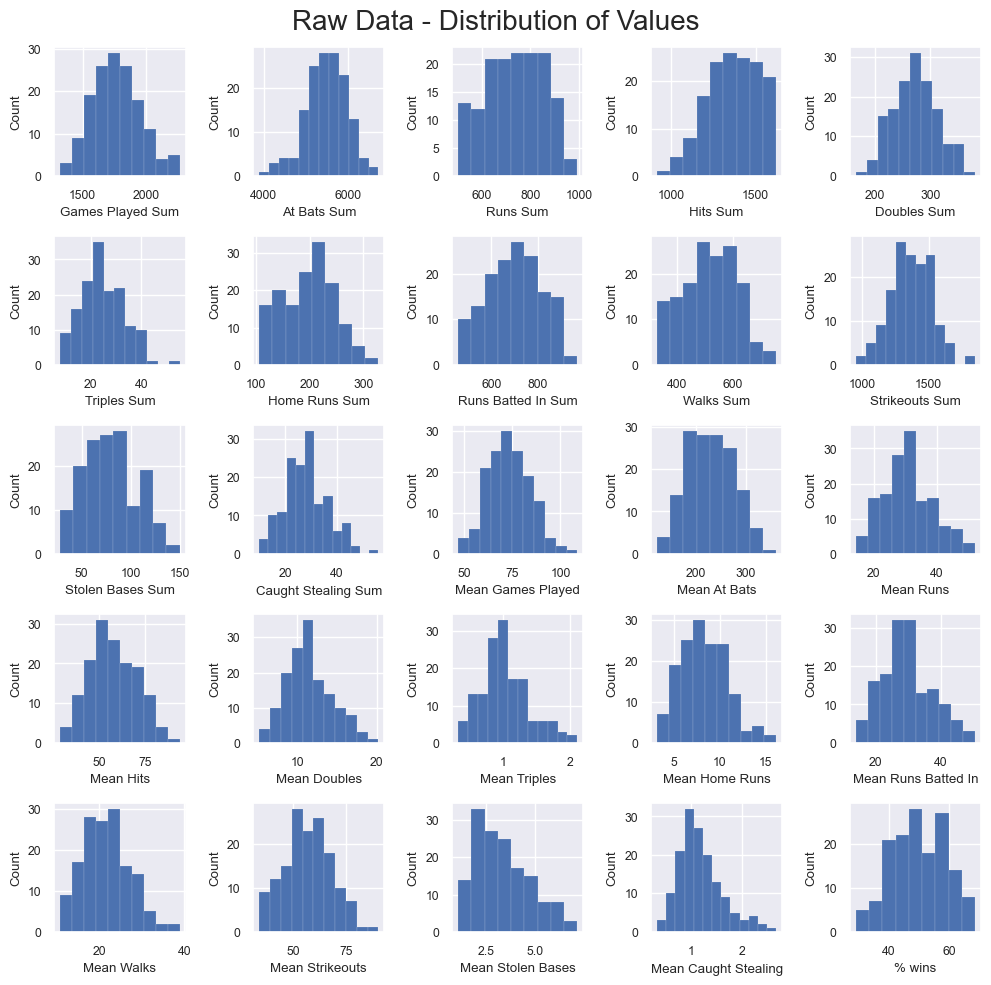

In [26]:
hist_grid(df=df, ncols=5, nrows=5, figsize=(10,10), 
          title="Raw Data - Distribution of Values", title_fontsize=20)

<div class="alert alert-block alert-info">
<b>'Plot distributions of each feature' notes:</b> Most features have a roughly normal  distribution. I don't see any extreme skewness that might justify loggin a variable. </div> 

<a id='Preprocessing'></a>
# 7. [Preprocessing](#Table_of_Contents)

<a id='Train_Test_Split'></a>
## 7 - A. [Train Test Split](#Table_of_Contents)
Use `sklearn.model_selection.train_test_split` (documentation [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) to create a train and test set. I will withhold 20% of data from the models learning-data, then use that 20% to test and evaluate my models performance.

<a id='TTS_separate'></a>
### 7 A - a. [Separate data into features and target](#Table_of_Contents)

In [27]:
X = df.drop(target, axis = 1)
y = df[target]

<a id='TTS_train_test_sets'></a>
### 7 A - b. [Split data into train and test sets](#Table_of_Contents)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=seed)

print(f'X_train has a shape of: {X_train.shape}')
print(f'y_train has a shape of: {y_train.shape}')
print()
print(f'X_test has a shape of: {X_test.shape}')
print(f'y_test has a shape of: {y_test.shape}')

X_train has a shape of: (120, 24)
y_train has a shape of: (120,)

X_test has a shape of: (30, 24)
y_test has a shape of: (30,)


<a id='Scale_Data'></a>
## 7 - B. [Scale Data](#Table_of_Contents)

Feature scaling is a method used to normalize the range of the independent variables of data. A machine learning algorithm can only see numbers; this means, if there is a vast difference in the feature ranges (as there is with this data, demonstrated in step 4f) it makes the underlying assumption that higher ranging numbers have superiority of some sort and these more significant numbers start playing a more decisive role while training the model. Therefore, feature scaling is needed to bring every feature on the same footing.

**Standardization**

Feature standardization makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

$$x' = \dfrac{x - \bar x}{\sigma}$$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just changes the mean and the standard error!

**Normalization**
- Min-max scaling
 - This way of scaling brings all values between 0 and 1. 
 
$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$


- Mean normalization
 - The distribution will have values between -1 and 1, and a mean of 0.
 
$$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$$

- You can bound your normalization range by any interval `[a,b]` with

$$x' = a + \dfrac{(x - \min(x))(b - a)}{\max(x)-\min(x)}$$


---

Choosing which method to use depends on the distribution of your data.  A couple of relevant generalizations are: 

- Standardization may be used when data represent Gaussian Distribution, while Normalization is great with Non-Gaussian Distribution
- Impact of Outliers is very high in Normalization


<a id='Scale_Data_scaled'></a>
### 7 B - a. [Scale and create new scaled dfs](#Table_of_Contents)

Because my data is normally distributed I will use `sklearn.preprocessing.StandardScaler` default standardization (documentation [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)):

$$z = (x - u) / s$$

Where u is the mean of the training samples, and s is the standard deviation of the training samples. 

In [29]:
scaler = StandardScaler()

# fit StandardScaler on the training data only
# convert to pandas dataframe. This is optional and a personal preference
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

# once fit on training data, transform testing data as well
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# view scaled training data
X_train_scaled

,Games Played Sum,At Bats Sum,Runs Sum,Hits Sum,Doubles Sum,Triples Sum,Home Runs Sum,Runs Batted In Sum,Walks Sum,Strikeouts Sum,...,Mean Runs,Mean Hits,Mean Doubles,Mean Triples,Mean Home Runs,Mean Runs Batted In,Mean Walks,Mean Strikeouts,Mean Stolen Bases,Mean Caught Stealing
0,0.758991,1.003183,0.147989,0.437794,-0.330702,0.627707,1.026877,0.174469,0.827140,1.961168,...,-0.129660,-0.048693,-0.407207,0.476642,0.581548,-0.108491,0.373650,0.885470,0.176397,0.614693
1,-0.249940,-1.279399,-1.788392,-1.359299,-1.423417,0.386281,-1.669655,-1.706088,-1.687451,-0.621036,...,-1.651188,-1.382995,-1.433419,-0.184920,-1.659444,-1.623257,-1.741270,-1.289695,-0.927516,-0.607806
2,-0.222963,0.946851,2.194777,1.451718,0.655407,-0.941560,2.720047,2.184423,1.083949,0.830228,...,1.300718,0.623169,0.304370,-0.910530,2.041855,1.328224,0.743720,0.464215,-0.811441,-0.547014
3,1.670806,1.287097,1.566302,0.983215,-0.064186,0.506994,1.424040,1.468431,1.340758,0.902137,...,0.073455,-0.460146,-0.799802,-0.087631,0.308672,0.047307,0.070457,-0.524532,-0.224553,-1.145338
4,-0.233754,0.241571,-0.115291,-0.757937,-0.943688,-1.665837,0.253453,-0.023938,0.409825,1.261685,...,-0.286668,-0.595129,-0.738676,-1.667596,0.010795,-0.229607,0.084029,0.477865,-0.518235,-0.365149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-0.692358,0.559285,1.702189,1.311866,1.188439,-0.217283,2.281077,1.753102,0.035311,-0.313787,...,2.294236,1.910845,1.856945,0.506340,3.002583,2.361774,1.048258,1.151326,-1.429046,-0.219814
116,-0.028730,0.913051,1.438909,1.444725,2.014638,0.386281,1.005973,1.364914,0.827140,0.346473,...,1.265226,1.093422,1.544922,0.681832,1.083587,1.236470,0.977194,0.684265,-0.070705,0.456785
117,1.589875,0.910798,1.099193,0.885319,0.335588,0.627707,0.901457,1.140627,1.597567,1.032882,...,0.113075,-0.195687,-0.351162,0.225854,0.213615,0.155585,0.540876,-0.086913,-0.668124,0.370557
118,-0.136637,-0.830994,-0.939102,-0.827863,0.335588,0.144855,-0.896231,-0.869327,-1.045428,-0.300712,...,-1.390626,-1.394014,-0.841882,-0.542690,-1.300396,-1.359229,-1.531041,-1.409507,-1.543135,-0.741570


<a id='Scale_Data_explore'></a>
### 7 B - b. [Explore the scaling effect on training data](#Table_of_Contents)

<a id='Scale_Data_describe'></a>
#### 7 B b - i. [Check `X_train_scaled` describe](#Table_of_Contents)

In [30]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Games Played Sum,120.0,-2.294461e-16,1.004193,-2.332545,-0.731475,-0.112358,0.641642,2.436945
At Bats Sum,120.0,-6.957398e-16,1.004193,-2.786849,-0.722273,0.039902,0.726028,2.630057
Runs Sum,120.0,-3.774758e-16,1.004193,-1.966742,-0.722533,0.016349,0.748861,2.194777
Hits Sum,120.0,1.258253e-16,1.004193,-2.233371,-0.757937,-0.065672,0.880074,1.850295
Doubles Sum,120.0,-7.142435e-16,1.004193,-2.169661,-0.703824,-0.010883,0.608767,2.894140
Triples Sum,120.0,-7.401487e-17,1.004193,-2.027976,-0.730313,-0.096570,0.627707,3.645528
Home Runs Sum,120.0,1.480297e-17,1.004193,-1.878688,-0.823069,0.044420,0.692423,2.720047
Runs Batted In Sum,120.0,1.850372e-16,1.004193,-1.964881,-0.701112,0.036447,0.782631,2.322445
Walks Sum,120.0,-4.810966e-16,1.004193,-2.019163,-0.612062,0.019261,0.733511,2.421497
Strikeouts Sum,120.0,1.480297e-17,1.004193,-2.745635,-0.627574,0.006537,0.759952,2.739097


<div class="alert alert-block alert-info">
<b>Scaled .describe() notes:</b> Now that the df has been scaled this .describe() method is less useful. A visualization will explain the transformation better. </div> 

<a id='Scale_Data_viz'></a>
#### 7 B b - ii. [Visualizations](#Table_of_Contents)
pandas.DataFrame.describe method is great but it fails to truely convey how the data is transformed by scaling. The best way to view this change is with boxplots and histograms. 


<a id='Scale_Data_boxplots'></a>
##### 7 B b ii - 1. [boxplots](#Table_of_Contents)
seaborn.boxplot show the minimum, first quartile, median, third quartile, and maximum of features, documentation [HERE](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
Boxplots are a great way to see the change in the range of each independent feature before and after standard scaling. [`boxplots`](#boxplots) function used below.

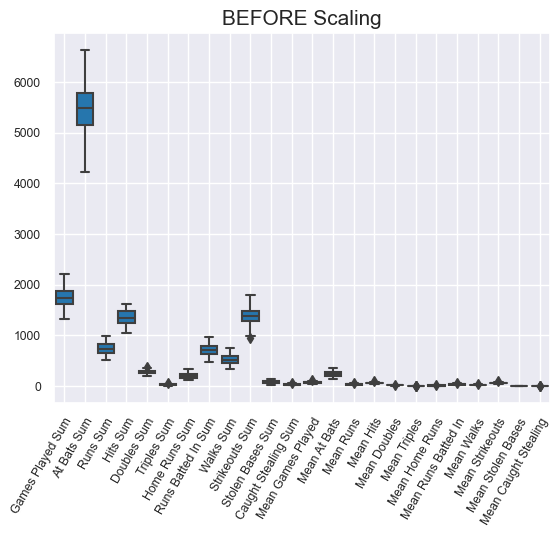

In [31]:
boxplots(X_train, "BEFORE Scaling", 15)

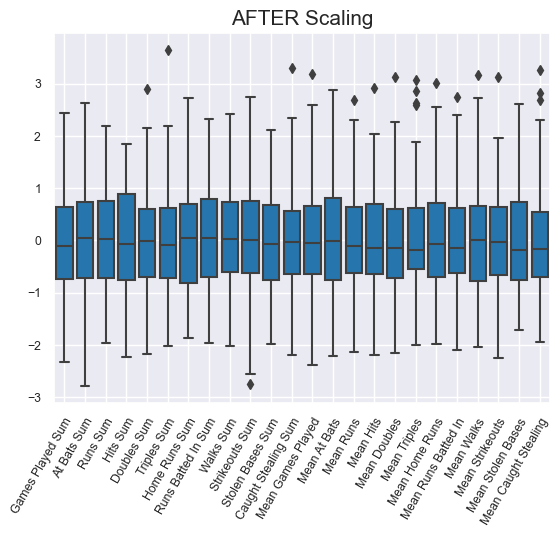

In [32]:
boxplots(X_train_scaled, "AFTER Scaling", 15)

<a id='Scale_Data_hists'></a>
##### 7 B b ii - 2. [histograms](#Table_of_Contents)
An additional way to view the scaling effect is through histograms. If you think of boxplots as a top view of distributions, then you can think of histograms as a side view. Imagine yourself standing on the right hand side of the above boxplots looking down the 0 line. [`hist_overlay`](#hist_overlay) function used below.

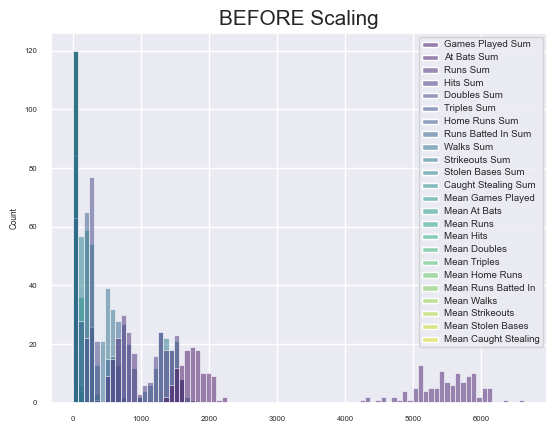

In [33]:
hist_overlay(X_train, "BEFORE Scaling", 15)

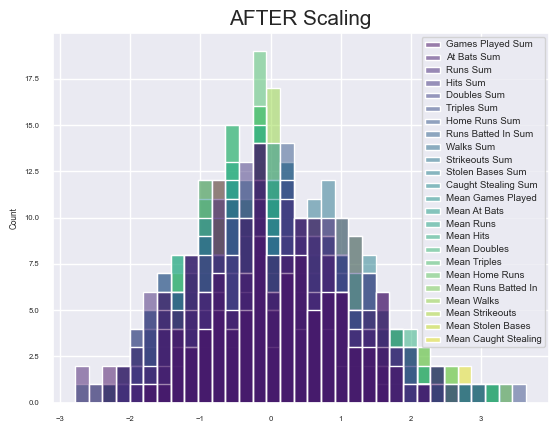

In [34]:
hist_overlay(X_train_scaled, "AFTER Scaling", 15)

<div class="alert alert-block alert-info">
<b>Visualization notes:</b> You can see the means of all the independent variables are roughly around 0 and they all have roughly the same min and max values. From the boxplots, you can also see there are a few outliers, primarily in the team averaged variables.</div> 

<a id='Feature_Reduction'></a>
## 7 - C. [Feature Reduction](#Table_of_Contents)

Before moving on I want to regplot all the independent variables. The first 12 features are cumulative totals of team stats and the second 12 are those same stats but divided by the number of players to get the mean. If I use both, the cumulative totals and the averages, there will be a lot of multicollinearity. Multicollinearity occurs when two or more independent variables are highly correlated with one another, and as you can imagine using one statistic to acquire the other would have a high correlation. So I need to make a choice on which set to use. 


<a id='Scale_Data_regplots'></a>
### 7 C - a. [Regplots](#Table_of_Contents)
Use regplots to show me which features have a 'cleaner' linear relationship with target variable. This method is used to plot data and a linear regression model fit. There are a number of mutually exclusive options for estimating the regression model see documentation [HERE](https://seaborn.pydata.org/generated/seaborn.regplot.html). [`regplot_grid`](#regplot_grid) function used below.

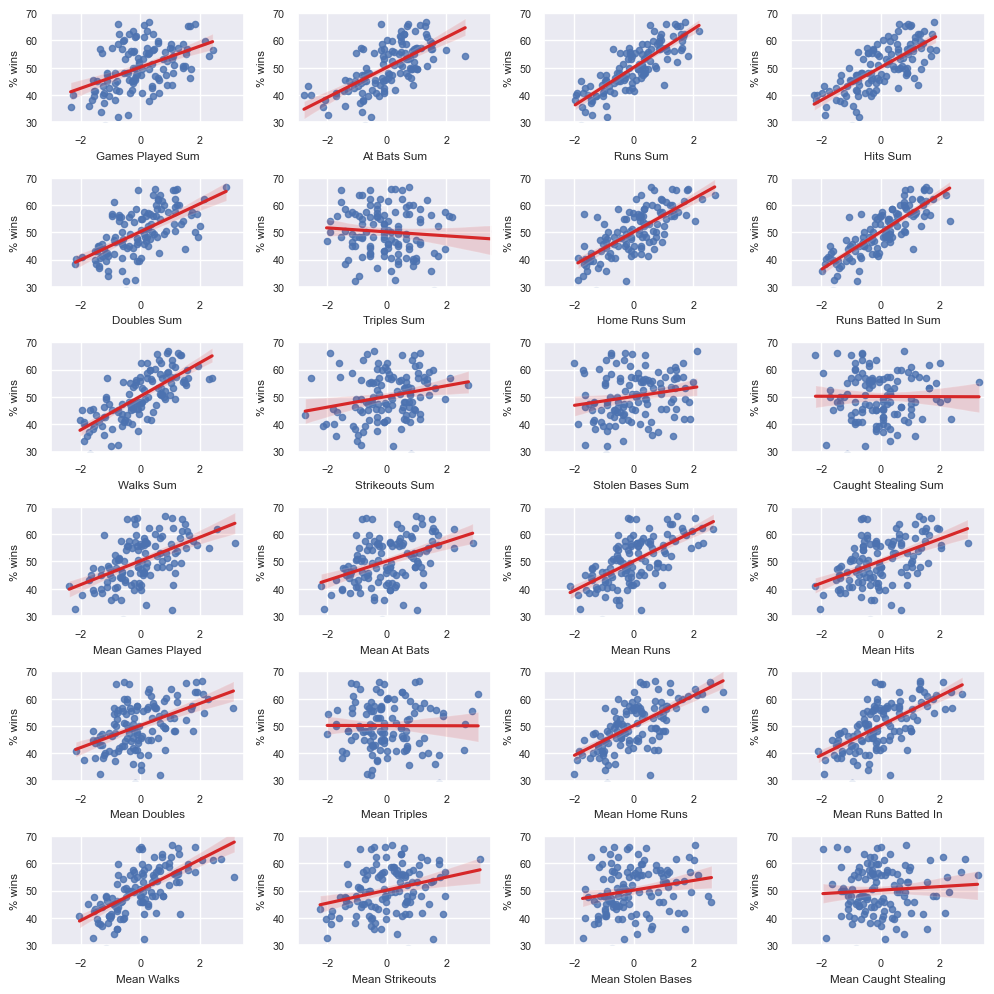

In [35]:
regplot_grid(X_train_scaled, 4, 6, (10,10))

<div class="alert alert-block alert-info">
<b>Regplots notes:</b> It appears to me that the cumulative sum totals have either the same or even cleaner linear relationships with the target variable. You can see this with just the scatter plots alone but the red shaded band is perhaps a better representation. This red line shows what a linear model might look like, with the shaded part being the confidence interval. The more "noise" the wider that red shaded area. A perfectly confident model would be a clean red line without a shaded band. I will use heatmaps to investigate further.</div> 

<a id='Scale_Data_heatmaps'></a>
### 7 C - b. [Heatmaps](#Table_of_Contents)

The regplots show the relationship between the features and target variable. The heatmap will show the  correlations between all of the numeric values (in this case, all the features) in our data. The x and y axis labels indicate the pair of values that are being compared, and the color and the number are both representing the correlation. Color is used here to make it easier to find the largest/smallest numbers. The bottom row is particularly important because it shows all the features correlation with the target variable but I am also looking for strong correlation between the independent variables. Documentation [HERE](https://seaborn.pydata.org/generated/seaborn.heatmap.html). [`heatmap`](#heatmap) function used below.

<a id='Scale_Data_heatmaps_setup'></a>
#### 7 C b - i. [Set up for heatmap plots](#Table_of_Contents)
Converting `train_scaled` and `test_scaled` to a pandas df reset the indices. I now need to convert `y_train` and `y_test` to a pandas df and reset the indices so I can concat `train_scaled` and `y_train` to create a visualization df. 

In [36]:
##################################
# Convert y_train and y_test to  #
# pandas data frame              #
##################################
# y_test to a df
y_test = pd.DataFrame(y_test).reset_index(drop=True)

# y_train to a df
y_train = pd.DataFrame(y_train).reset_index(drop=True)


##################################
# Concat train_scaled cumulative #
# features to y_train            #
##################################
# extract just the cumulative sum features from X_train_scaled
sum_feats = X_train_scaled[X_train_scaled.columns[:12]]

# create pandas dataframe with cumulative sum features and target variable
sumz = pd.concat([sum_feats, y_train], axis=1)


##################################
# Concat train_scaled averaged   #
# features to y_train            #
##################################
# extract just the averaged features from X_train_scaled
mean_feats = X_train_scaled[X_train_scaled.columns[12:]]

# create pandas dataframe with averaged features and target variable
meanz = pd.concat([mean_feats, y_train], axis=1)

<a id='Scale_Data_heatmaps_cumu'></a>
##### 7 C b i - 1. [Heatmap - cumulative features](#Table_of_Contents)

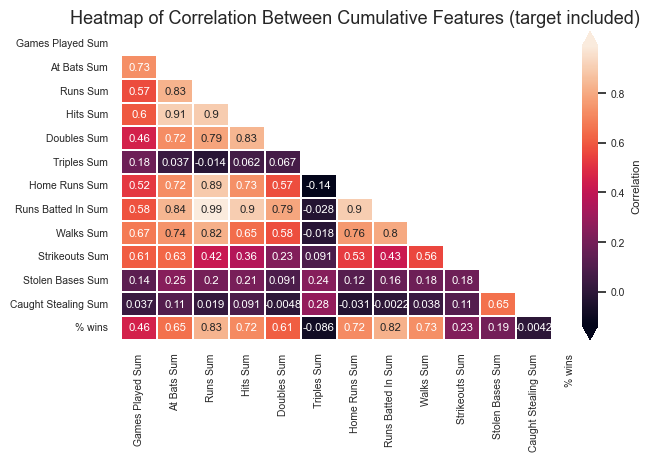

In [37]:
heatmap(sumz, "Heatmap of Correlation Between Cumulative Features (target included)")

<a id='Scale_Data_heatmaps_avg'></a>
##### 7 C b i - 2. [Heatmap - averaged features](#Table_of_Contents)

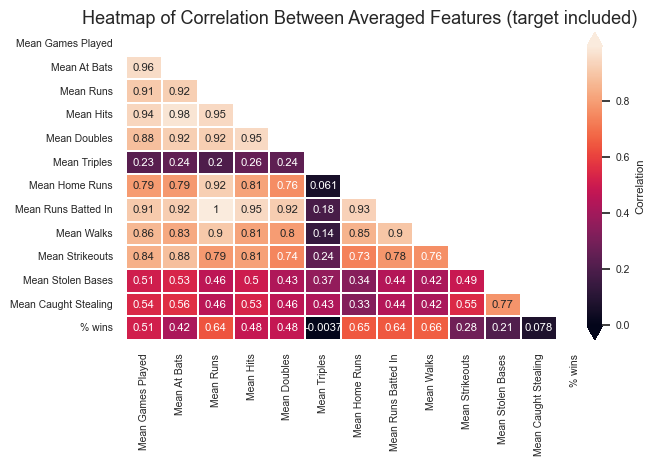

In [38]:
heatmap(meanz, "Heatmap of Correlation Between Averaged Features (target included)")

<div class="alert alert-block alert-info">
<b>Heatmap notes:</b> Interestingly, the averaged variables have a few features with a stronger correlation with the target variable than those of the corresponding cumulative variables. Overall however, the cumulative features seem to have stronger correlations. In addition, there are a lot more .9 (or above) inter-feature correlations among the averaged variables. The averaged variables have 18 inter correlated pairs of .9 or greater, while the cumulative variables have only 5.</div> 

<a id='Feature_Reduction_selection'></a>
### 7 C - c. [ Selecting Features to Drop](#Table_of_Contents)
Based on the Heatmap and Regplots I will *keep* the cumulative sum features. I need to eliminate the highly correlated features while keeping as much data as possible. This means I need to remove the least amount of features possible. `Runs Sum` has the highest correlation with `% wins` so I want to keep this feature. 

![feature elimination tables](../images/elimination_tables.png)

By eliminating `Hits Sum` & `Runs Batted In Sum` I can remove all the pairs with a correlation of .9 or greater. This leaves:
- `Games Played Sum`
- `At Bats Sum`
- `Runs Sum`
- `Doubles Sum`
- `Triples Sum`
- `Home Runs Sum`
- `Walks Sum`
- `Strikeouts Sum`
- `Stolen Bases Sum`
- `Caught Stealing Sum`


**Note: this is likely not a comprehensive selection of features to be eliminated.* 

<a id='Feature_Reduction_drop'></a>
### 7 C - d. [Drop Features](#Table_of_Contents)
Create reduced dfs from `X_test_scaled` & `X_train_scaled`

New variables 
- `X_train_s_r`: "X_train, scaled, and reduced"
- `X_test_s_r`: "X_test, scaled, and reduced"

In [39]:
X_train_s_r = X_train_scaled[X_train_scaled.columns[:12]].drop(['Hits Sum', 
                                                          'Runs Batted In Sum'], 
                                                         axis=1)

X_test_s_r = X_test_scaled[X_train_scaled.columns[:12]].drop(['Hits Sum', 
                                                        'Runs Batted In Sum'],
                                                       axis=1)
# View train
X_train_s_r

,Games Played Sum,At Bats Sum,Runs Sum,Doubles Sum,Triples Sum,Home Runs Sum,Walks Sum,Strikeouts Sum,Stolen Bases Sum,Caught Stealing Sum
0,0.758991,1.003183,0.147989,-0.330702,0.627707,1.026877,0.827140,1.961168,0.413310,1.036471
1,-0.249940,-1.279399,-1.788392,-1.423417,0.386281,-1.669655,-1.687451,-0.621036,-0.672477,-0.158308
2,-0.222963,0.946851,2.194777,0.655407,-0.941560,2.720047,1.083949,0.830228,-0.943923,-0.636220
3,1.670806,1.287097,1.566302,-0.064186,0.506994,1.424040,1.340758,0.902137,0.374532,-0.994653
4,-0.233754,0.241571,-0.115291,-0.943688,-1.665837,0.253453,0.409825,1.261685,-0.478586,-0.277786
...,...,...,...,...,...,...,...,...,...,...
115,-0.692358,0.559285,1.702189,1.188439,-0.217283,2.281077,0.035311,-0.313787,-1.990932,-0.875176
116,-0.028730,0.913051,1.438909,2.014638,0.386281,1.005973,0.827140,0.346473,-0.284696,0.319603
117,1.589875,0.910798,1.099193,0.335588,0.627707,0.901457,1.597567,1.032882,-0.478586,1.036471
118,-0.136637,-0.830994,-0.939102,0.335588,0.144855,-0.896231,-1.045428,-0.300712,-1.486817,-0.158308


<a id='Pairplot'></a>
#### 7 C d - i. [Pairplot](#Table_of_Contents)
The final visualization to check inter feature correlation is a pairplot. Pairplots are great ways to see the relationship between two features using scatter plots. Pariplots also show the distribution of each feature across the diagonal. This has already  been plotted but here we can see just the features I have decided to keep.


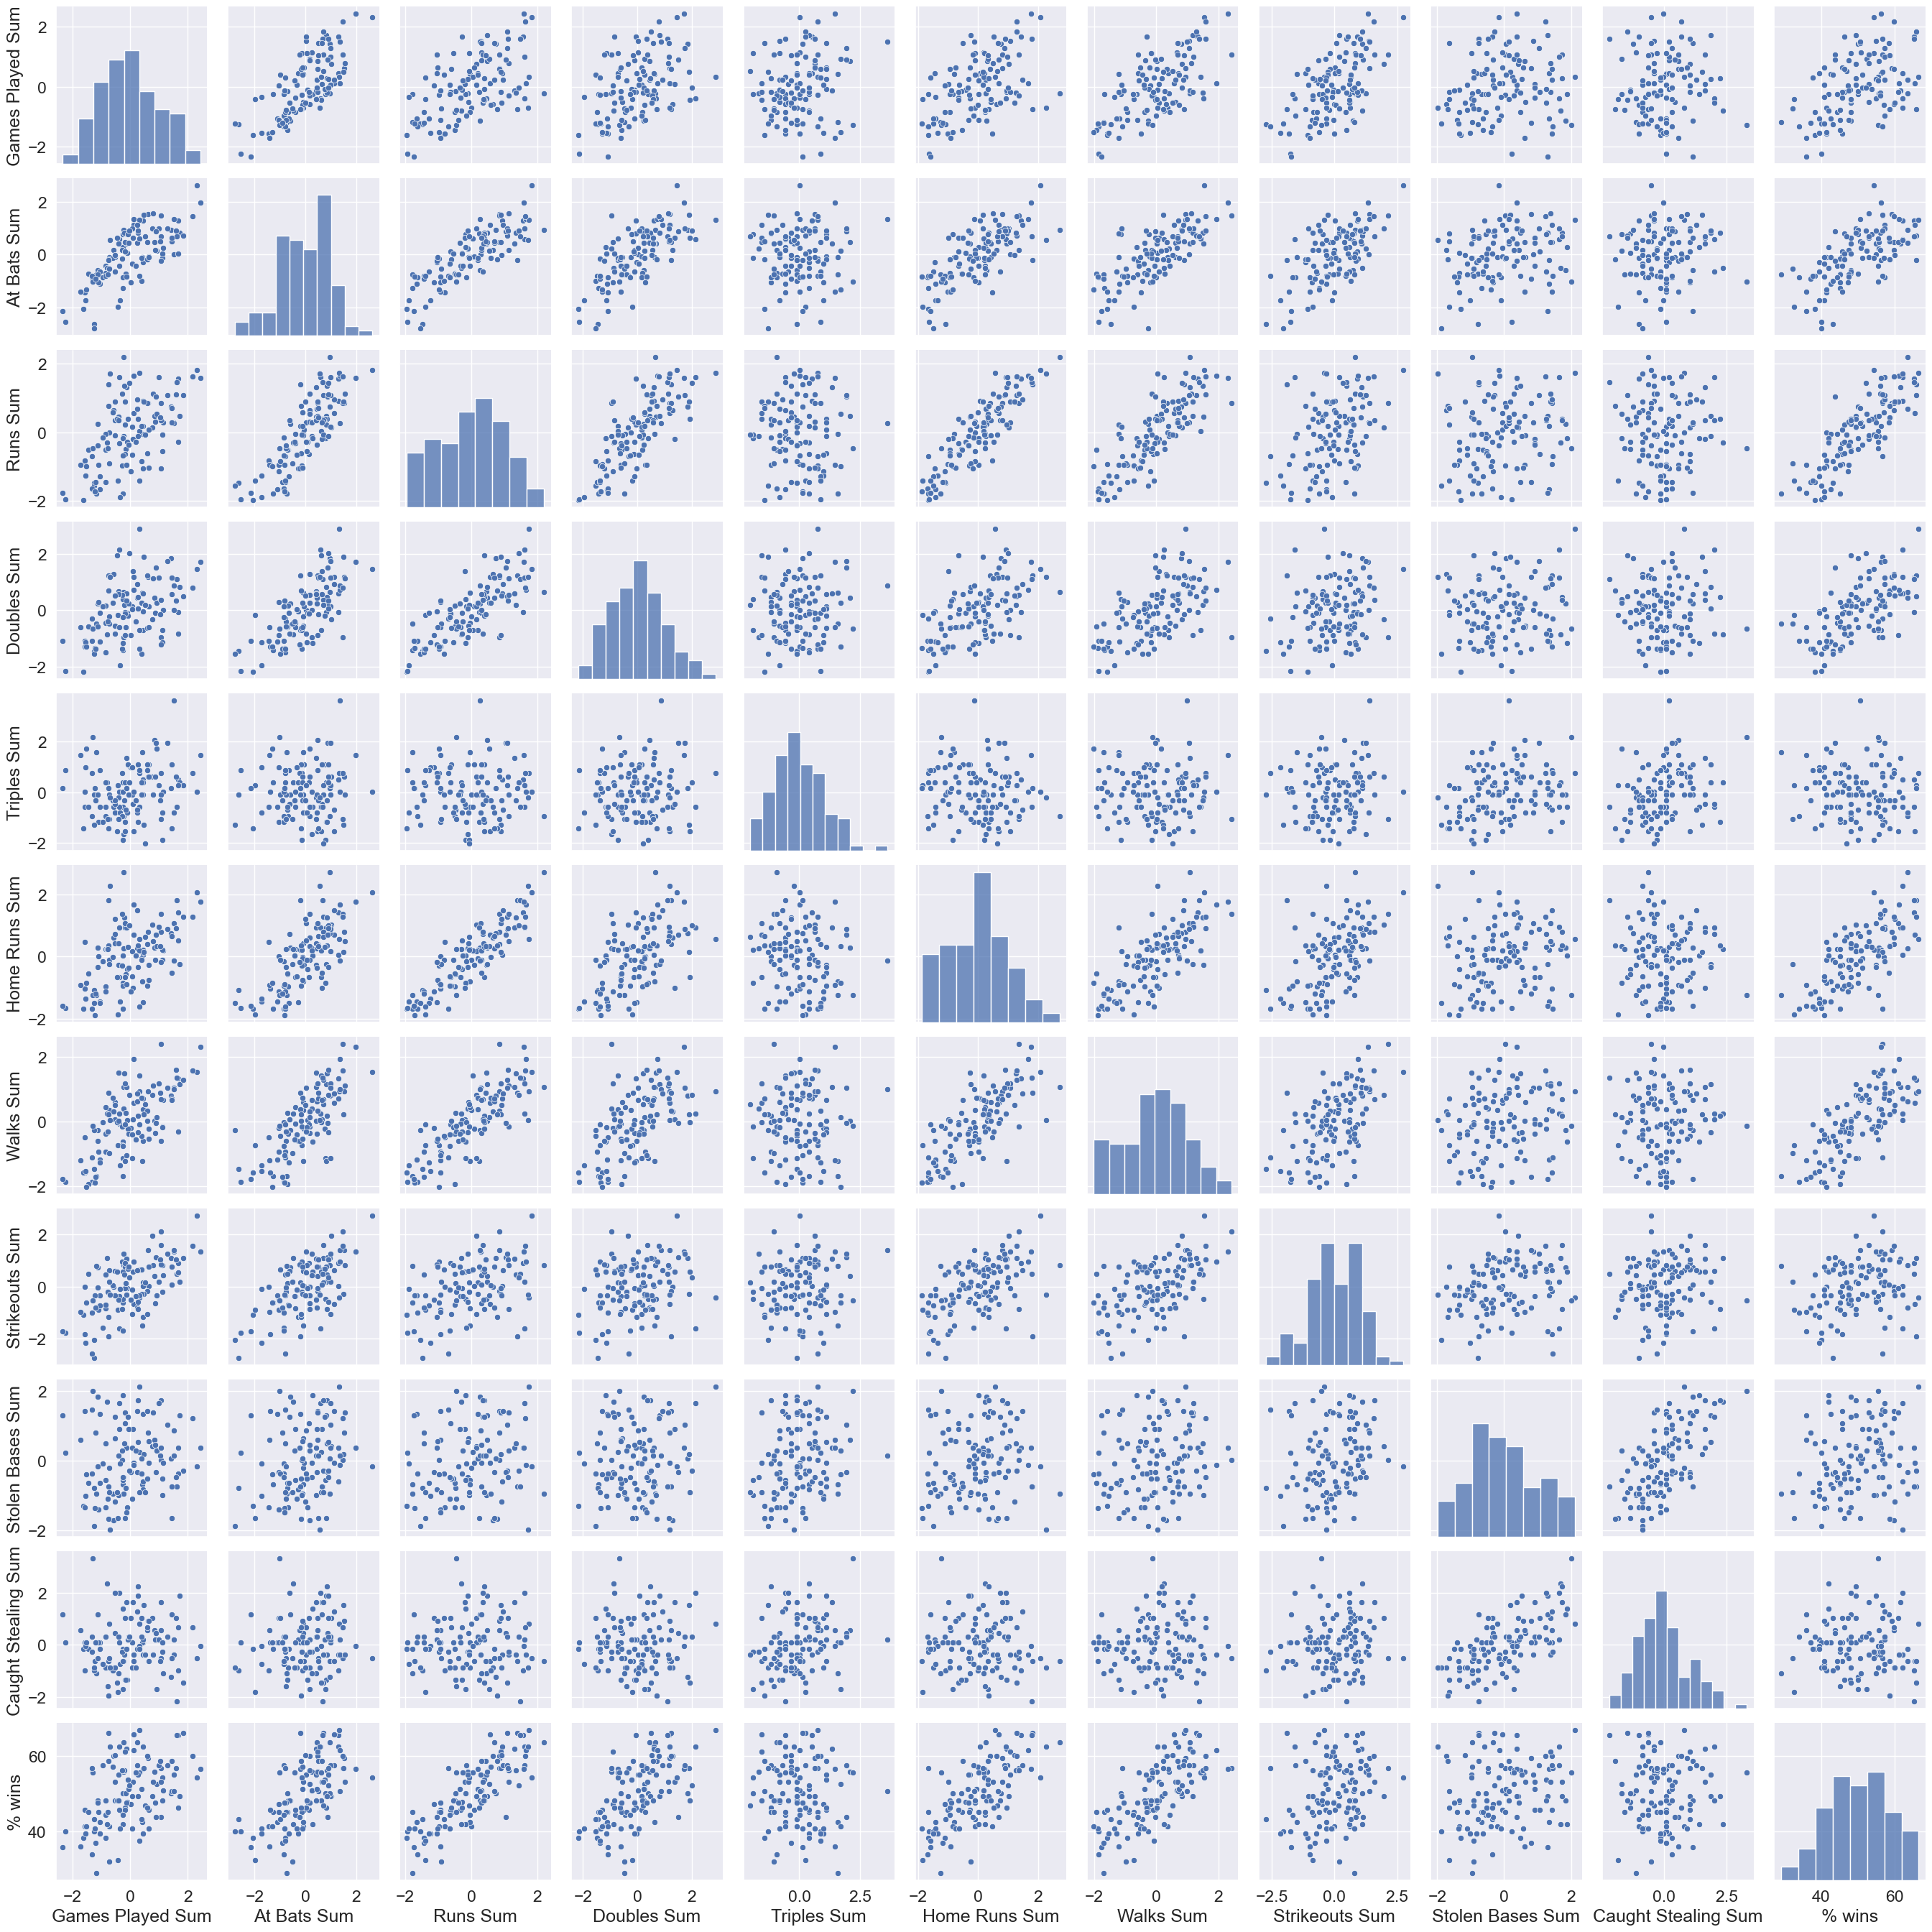

In [40]:
sns.set_theme(font_scale=1.5) 
sns.pairplot(sumz.drop(['Hits Sum','Runs Batted In Sum'], axis=1));

<div class="alert alert-block alert-info">
<b>Pairplot notes:</b> I can see there are still quite a bit of features that are correlated with eachother. These will likely be filtered out by p value when modeling. </div> 

<a id='Investigate_Outliers'></a>
## 7 - D. [Investigate Outliers](#Table_of_Contents)

Removing outliers can reduce the errors (or residuals) of a model. However, not all outliers should be removed, and Jim, from *Statistics By Jim*, perfectly states in [Guidelines for Removing and Handling Outliers in Data](https://statisticsbyjim.com/basics/remove-outliers/), "It’s bad practice to remove data points simply to produce a better fitting model or statistically significant results." 
There are other ways to deal with outliers than to do a blanketed removal. The most common is logging. Before deciding to add more complexity to my model by logging features, I need to investigate where these outliers are, and how many? Is the complexity worth it for a few data points? [`boxplots`](#boxplots) function used below.


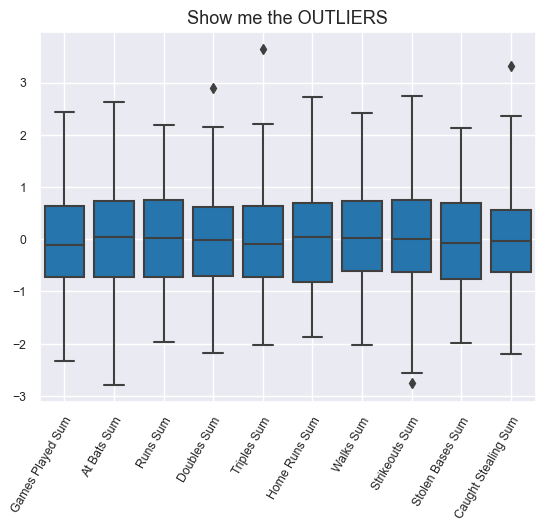

In [41]:
boxplots(X_train_s_r, "Show me the OUTLIERS", 13)

<div class="alert alert-block alert-info">
<b>Boxplot notes:</b> Only 4 features have outliers and it looks like they each have only 1. </div> 

I will check the number of outliers by using the [`print_outliers`](#print_outliers) function. This will identify outliers from a column based on zscore. If 3 standard deviations away from mean the data point is considered an outlier. 

In [42]:
print_outliers(X_train_s_r)

Triples Sum has 1 outlier(s)
Caught Stealing Sum has 1 outlier(s)


<div class="alert alert-block alert-info">
<b>Investigate Outliers notes:</b> These outliers are likely due to natural variation but my sample size is relatively low. Yes it covers 5 year of data but each season only has 24 teams i.e. data points. I think If I were able to increase my sample size, these outliers would fall within the typical gaussian bell curve.</div> 

<a id='Linear_Regression_Modeling-Scaled'></a>
# 8. [Linear Regression Modeling - Scaled Data](#Table_of_Contents)

<a id='Linear_Regression_Modeling-build_models'></a>
## 8 - A. [Build baseline and final model](#Table_of_Contents)
This is all wrapped up in a beautiful function that creates a baseline model by determining the highest positively correlated feature with `% wins`. Then it iteratively adds features based on the features p value. See [`build_models`](#build_models) docstring for more info. 

*****************************************************
BASELINE MODEL


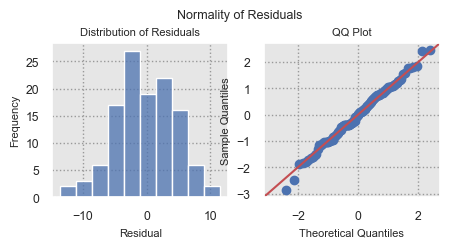


    r_sq: 0.6873044016884708
    r_sq_adjusted: 0.6846544389909155
    k_fold_r: 0.6521724605672568
    


,coef,std err,t,P>|t|,[0.025,0.975]
const,50.1761,0.435,115.405,0.000,49.315,51.037
Runs Sum,7.0021,0.435,16.105,0.000,6.141,7.863


*****************************************************
-----------------------------------------------------
FINAL MODEL


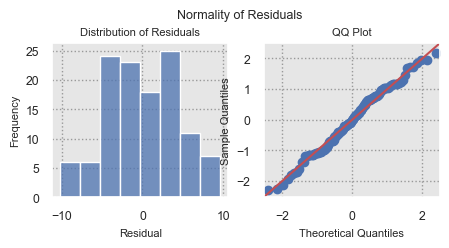


    r_sq: 0.7270266292479886
    r_sq_adjusted: 0.7199669731078503
    k_fold_r: 0.688273334740025
    


,coef,std err,t,P>|t|,[0.025,0.975]
const,50.1761,0.410,122.466,0.000,49.365,50.988
Runs Sum,5.7835,0.712,8.121,0.000,4.373,7.194
Strikeouts Sum,-1.8262,0.494,-3.698,0.000,-2.804,-0.848
Walks Sum,2.4333,0.777,3.132,0.002,0.895,3.972


-----------------------------------------------------


In [43]:
final_model_cols = build_models(pd.concat([X_train_s_r, y_train], axis=1))

Save final model predictors.

In [44]:
feats = list(final_model_cols)
feats.remove(target)
print(f"""
Features used in final_model to predict win percentage: 

{feats}
""")


Features used in final_model to predict win percentage: 

['Runs Sum', 'Strikeouts Sum', 'Walks Sum']



<a id='Evaluation_of_Final_Model'></a>
## 8 - B. [Evaluation of Final Model](#Table_of_Contents)

<a id='final_scaled_model_df'></a>
### 8B - a. [Create `final_scaled_model_df`](#Table_of_Contents)

Reminder of variable: `sumz` is the df with all cumulative (i.e. Sums) features. It was concatenated with y_train for plotting a heatmap. 

In [45]:
final_scaled_model_df = sumz[final_model_cols]
final_scaled_model_df

,% wins,Runs Sum,Strikeouts Sum,Walks Sum
0,49.38,0.147989,1.961168,0.827140
1,45.06,-1.788392,-0.621036,-1.687451
2,63.58,2.194777,0.830228,1.083949
3,65.43,1.566302,0.902137,1.340758
4,55.83,-0.115291,1.261685,0.409825
...,...,...,...,...
115,62.35,1.702189,-0.313787,0.035311
116,52.15,1.438909,0.346473,0.827140
117,56.79,1.099193,1.032882,1.597567
118,47.53,-0.939102,-0.300712,-1.045428


<a id='assumption_checks'></a>
### 8B - b.[Linear Regression Assumption checks](#Table_of_Contents)
Regression is a powerful analysis however, if some of the necessary assumptions are not satisfied, regression makes biased and unreliable predictions. Below I check the following 4 assumptions:
- Independence Assumption
- Linearity Assumption
- Homoscedasticity Assumption
- Normality Assumption

I give brief explanations of these assumption checks at each header but you can also visit:
- [HERE](https://github.com/learn-co-curriculum/dsc-regression-assumptions#about-regression-assumptions) for a short summary of Linearity, Homoscedasticity, and Normality Assumptions. 

<a id='Independence_Assumption'></a>
#### 8Bb - i. [Independence Assumption](#Table_of_Contents)

Because I am using this model for both inferential and predictive purposes I need to ensure that each observation is independent of the others. A violation of the independence assumption results in incorrect confidence intervals and p-values, it can essentially be thought of as a kind of double-counting in the model and it can produce estimates of the regression coefficients that are not statistically significant. 

This article ["How to detect and deal with Multicollinearity"](https://towardsdatascience.com/how-to-detect-and-deal-with-multicollinearity-9e02b18695f1) does a really good job of explaining the differences between using correlations vs VIF, 
>A correlation plot can be used to identify the correlation or bivariate relationship between two independent variables whereas VIF is used to identify the correlation of one independent variable with a group of other variables. Hence, it is preferred to use VIF for better understanding.
>
>- VIF = 1 → No correlation
>- VIF = 1 to 5 → Moderate correlation
>- VIF >10 → High correlation

Below I check the correlation between the 3 independent features that made it into the model. I do this using the function [`collinearity_pairs`](#collinearity_pairs) which returns pandas.DataFrame of pairs of features with correlations between .75 and 1. 

In [46]:
collinearity_pairs(final_scaled_model_df.drop(target, axis=1))

,cc
pairs,
"(Runs Sum, Walks Sum)",0.817018


<div class="alert alert-block alert-info">
<b>collinearity_pairs notes:</b> You can see that `Runs Sum` and `Walks Sum` have a Pearson's correlation of 0.8127. As stated above this is just a measurement of the two features with each other and not a measure of each independent variable with the group of other variables in the model. So while it is interesting to see this correlation is so high, it does not tell me much about how these two variables might impact my models inferential capabilities.  </div> 

Variance inflation factor is a measure of the degree of multicollinearity or correlation between the independent variables in your multiple linear regression analysis. The rules of thumb are listed above. Statsmodels has a VIF function, [statsmodels.stats.outliers_influence.variance_inflation_factor](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html), and states, 
>One recommendation is that if VIF is greater than 5, then the explanatory variable given by exog_idx is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

Based on this and the above rule of thumbs, I have a function [`get_VIFs_above5`](#get_VIFs_above5) that does exactly as it sounds, it returns any feature with an VIF above 5.

In [47]:
get_VIFs_above5(final_scaled_model_df, final_scaled_model_df[feats])

,0


<div class="alert alert-block alert-success">
<b>get_VIFs_above5 notes:</b> Nothing returned, this means there are no features that have a VIF above 5. The assumption of independence is satisfied </div> 

<a id='Linearity_Assumption'></a>
#### 8Bb - ii. [Linearity Assumption](#Table_of_Contents)

The linearity assumption requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant. If you were to try to fit a linear model to a non-linear data set, OLS would fail to capture the trend mathematically, resulting in an inaccurate relationship. This will also result in erroneous predictions on an unseen data set.

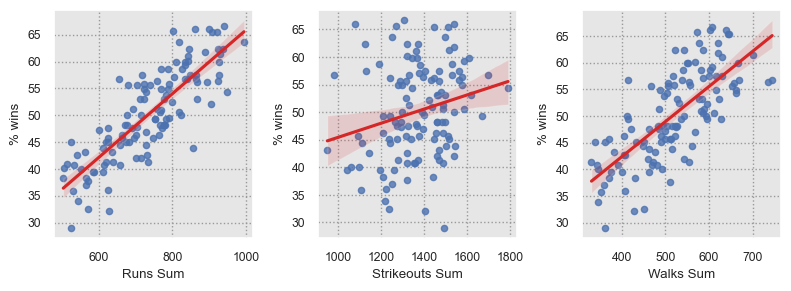

In [48]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(8,3))
fig.set_tight_layout(True)

plots = final_scaled_model_df.drop(target, axis=1)

for index, col in enumerate(plots.columns):

    ax = axes[index]

    sns.regplot(x = col, 
                y = y_train, 
                data = X_train, 
                ax=ax, 
                line_kws={"color": "tab:red"}, # change color of line
                scatter_kws={'s':20}, # change size of dots
                seed=seed)
    ax.set_xlabel(col)
    ax.set_ylabel(target)

<div class="alert alert-block alert-success">
<b>Linearity assumption notes:</b> The three features show varying degrees of a linear relationship with the target feature. The assuption of linearity is satisfied.  </div> 

<a id='Homoscedasticity_Assumption'></a>
#### 8Bb - iii. [Homoscedasticity Assumption](#Table_of_Contents)
Homoscedasticity indicates that a dependent variable's variability is equal across values of the independent variable. A scatter plot is a good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line). 

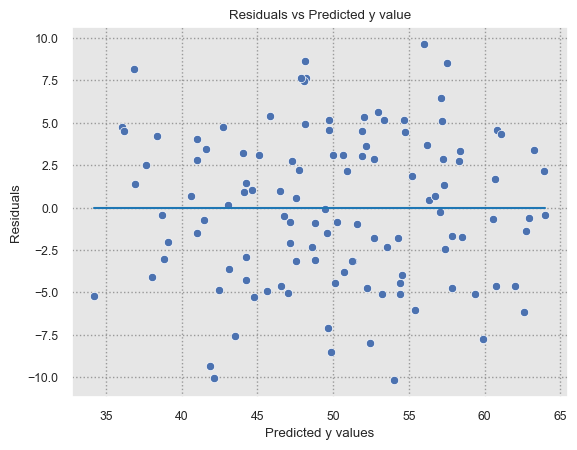

In [49]:
final_model = fit_model(final_scaled_model_df)

# plot the residuals against predicted values
y_pred = final_model.fittedvalues

# check for homoscedasticity
p = sns.scatterplot(x=y_pred,y=final_model.resid)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')
#plt.xlim(70,100)
p = sns.lineplot(x=[y_pred.min(),y_pred.max()],y=[0,0],color='tab:blue')
p = plt.title('Residuals vs Predicted y value')

<div class="alert alert-block alert-success">
<b>Homoscedasticity assumption notes:</b> The scatter plot of residuals do not show any kind of pattern and are equally distributed. The assumption of homoscedasticity is satisfied.</div> 

<a id='Normality_Assumption'></a>
#### 8Bb - iv. [Normality Assumption](#Table_of_Contents)
The normality assumption states that the model residuals should follow a normal distribution. This can be viewed with either a histogram or a QQ Plot of the residuals. I prefer to use both to fully understand the distribution. 

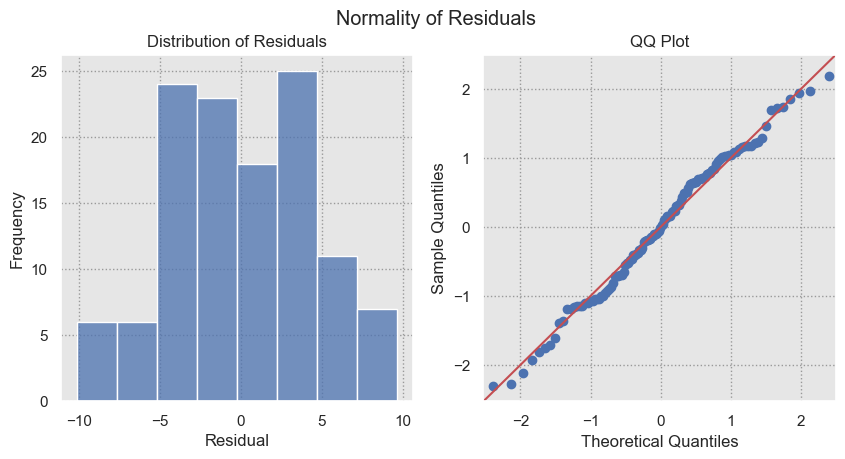

In [50]:
sns.set(font_scale=1)
normality_check(final_scaled_model_df)

<div class="alert alert-block alert-success">
<b>Normality assumption notes:</b> The histogram and qq plots show the resdiuals have a roughly normal distribution. The assumption of normality is satisfied.</div> 

<a id='RMSE'></a>
### 8B - c. [Root Mean Squared Error](#Table_of_Contents)
Root mean square error is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance (i.e. the length of a line segment between the two points).


In [51]:
# manually check 
y = final_scaled_model_df[['% wins']]
X = final_scaled_model_df.drop('% wins', axis=1)

reg = LinearRegression().fit(X, y)

print(reg.score(X, y)) # r squared
print(reg.coef_)
print(reg.intercept_)
print()
X_test_final = X_test_s_r[X.columns]


preds = reg.predict(X_test_final)

#Calculate root mean squared error to evaluate model performance
print('MSE : ', mean_squared_error(y_test,preds))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,preds)))


0.7270266292479886
[[ 5.78353138 -1.82618568  2.43327015]]
[50.17608333]

MSE :  33.78809248898828
RMSE :  5.812752574210284


<div class="alert alert-block alert-info">
<b>RMSE notes:</b> This RMSE means, on average, this model is off by about 5.81%</div> 

<a id='Interpreting_model_results'></a>
## 8 - C. [Interpreting model results](#Table_of_Contents)
[`coeffs_to_df`](#coeffs_to_df) function used below. This function has a parameter `predictors_scaled` when set to `True` it takes the standard deviation of each predictor and names the columns in a translatable way that makes it easy to interpret the coefficients. 


In [52]:
coeffs_to_df(final_scaled_model_df, predictors_scaled=True)

,For every [X] increase,"in [this] feature, results, on average,",in [this] amount of change in % of wins
0,117.75,Runs Sum,5.783531
2,152.97,Walks Sum,2.433270
1,93.45,Strikeouts Sum,-1.826186


<div class="alert alert-block alert-info">
<b>`coeffs_to_df` notes:</b> This df shows, RUNS is the most significant feature when predicting a teams win percentage. Each increase of 118 RUNS, results, on average, in an increase of 5.78% of WINS in a teams regular season. Next is WALKS. Each increase of 153 WALKS, results, on average, in an increase of 2.43% of WINS in a team's regular season. And finally, STRIKEOUTS. Each increase of 93 STRIKEOUTS, results, on average, in a <em>decrease</em> of 1.83% of WINS in a teams regular season. </div> 

To put this into perspective, I will create a dataframe with world series winners for 2022, 2021, 2019, 2018, and 2017. I will include just the three predictive features from the model and the teams regular season win percentage.  I will also include the SF Giants for each respective year for comparison. 

In [53]:
# get world series winners
WorldSeriesWinner_22 = whole[(whole['Team']=='HOU')&(whole['Year']=='2022')]
WorldSeriesWinner_21 = whole[(whole['Team']=='ATL')&(whole['Year']=='2021')]
WorldSeriesWinner_19 = whole[(whole['Team']=='WSH')&(whole['Year']=='2019')]
WorldSeriesWinner_18 = whole[(whole['Team']=='BOS')&(whole['Year']=='2018')]
WorldSeriesWinner_17 = whole[(whole['Team']=='HOU')&(whole['Year']=='2017')]

# get sf Giants 
sf_giants_22 = whole[(whole['Team']=='SF')&(whole['Year']=='2022')]
sf_giants_21 = whole[(whole['Team']=='SF')&(whole['Year']=='2021')]
sf_giants_19 = whole[(whole['Team']=='SF')&(whole['Year']=='2019')]
sf_giants_18 = whole[(whole['Team']=='SF')&(whole['Year']=='2018')]
sf_giants_17 = whole[(whole['Team']=='SF')&(whole['Year']=='2017')]

compare_these = pd.concat([WorldSeriesWinner_22,
                           sf_giants_22,
                           WorldSeriesWinner_21,
                           sf_giants_21,
                           WorldSeriesWinner_19, 
                           sf_giants_19,
                           WorldSeriesWinner_18, 
                           sf_giants_18,
                           WorldSeriesWinner_17, 
                           sf_giants_17])[['Team', 
                                           'Year', 
                                           'Runs Sum', 
                                           'Walks Sum', 
                                           'Strikeouts Sum', 
                                           '% wins']]

compare_these

,Team,Year,Runs Sum,Walks Sum,Strikeouts Sum,% wins
6,HOU,2022,801,573,1271,65.64
17,SF,2022,678,543,1390,50.00
31,ATL,2021,949,662,1790,54.32
47,SF,2021,862,639,1540,66.05
71,WSH,2019,925,630,1402,57.41
77,SF,2019,625,421,1325,47.53
105,BOS,2018,940,606,1307,66.67
107,SF,2018,525,361,1276,45.06
126,HOU,2017,924,542,1127,62.35
137,SF,2017,612,463,1195,39.51


<div class="alert alert-block alert-info">
<b>`compare_these` df notes:</b> The grey rows are the World Series winners, the white rows are the SF Giants team stats. You can see, with the exception of 2021, the world series winners had regular season win percentages of 10 - 22 percent more than the SF Giants. 2021 the Giants were 1st in National League West, eventually losing the National League Division Series (3-2) to the Dodgers who had a regular season win % of 65.43, less than 1% less than SF Giants. </div> 

<a id='lasso_ridge'></a>
# 9. [Can Lasso or Ridge regression improve predictive capabilities?](#Table_of_Contents)

Now that I have my Linear Regression model for interpretability, I can try to boost the predictive capacity by using Lasso and Ridge regression. Both are regularization techniques, one performing L1 regularization, and the other L2. 

Lasso Regression performs L1 regularization. L1 regularization takes the *absolute values* of the weights, so the cost only increases linearly. Lasso uses shrinkage, i.e. data values shrink towards a central point as the mean. 

Ridge Regression performs L2 regularization. L2 regularization takes the *square* of the weights, so the cost of outliers increases exponentially. Ridge regression is good to use if there is multicollinearity between the features of your data. When issues of multicollinearity occur, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 


<a id='reload_modeling_df'></a>
## 9 - A. [Re load `MODELING_DF`](#Table_of_Contents)
To ensure all variables are correct I will start from scratch and reload the `MODELING_DF`

In [54]:
whole = pd.read_pickle("../pickled_tables/MODELING_DF.pkl")
df = whole.drop(['Team', 'Year'], axis=1)

<a id='resplit_data'></a>
## 9 - B. [Re split data](#Table_of_Contents)

In [55]:
X = df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2, 
                                                    random_state=seed)

<a id='create_functions'></a>
## 9 - C. [Create functions](#Table_of_Contents)
To streamline comparisons between Ridge, Lasso, and LinearRegression, I will make a couple quick little functions. 

<a id='get_rmse'></a>
### 9C - a. [`get_rmse`](#Table_of_Contents)
This is mostly a helper function. It uses [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), and [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to fit a regressor to training data and get RMSE for test data.

In [56]:
def get_rmse(X_train, X_test, regressor):
    reg = make_pipeline(StandardScaler(), regressor)
    reg.fit(X_train, y_train)
    reg_RMSE = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
    return reg_RMSE

<a id='compare_metrics'></a>
### 9C - b. [`compare_metrics`](#Table_of_Contents)
This function uses `get_rmse` to print out rmse for [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression), [sklearn.linear_model.LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), and [sklearn.linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html). 

In [57]:
def compare_rmses(X_train, 
                  X_test, 
                  ridge=RidgeCV(), 
                  lasso=LassoCV(), 
                  lin=LinearRegression()):
    
    print(f'{ridge} rmse:\t\t\t{get_rmse(X_train, X_test, ridge)}')
    print(f'{lasso} rmse:\t\t\t{get_rmse(X_train, X_test, lasso)}')
    print(f'{lin} rmse:\t{get_rmse(X_train, X_test, lin)}')
    

<a id='rmse_all_feats'></a>
## 9 - D. [Get RMSE's for *all* features](#Table_of_Contents)
Use `compare_metrics` function with the entire `X_train` (all features) to check different RMSE's with 3 different models.


In [58]:
# to silence failure to converge warning
import warnings
warnings.filterwarnings('ignore')

compare_rmses(X_train, X_test)

RidgeCV() rmse:			6.073710918791899
LassoCV() rmse:			6.0315888246948015
LinearRegression() rmse:	6.600711237023368


<a id='plot_optimal_alphas'></a>
## 9 - E. [Plot optimal alphas (lambdas)](#Table_of_Contents)

This is more of a brute force approach, rather than trusting the automatic alpha selection, I want to check a range of alphas and plot the MSE for each. Then I will compare the RMSE metrics to see if there is any improvement. If not I will use the auto-selected alpha value. 

*Original code for plots can be found [HERE](https://github.com/learn-co-curriculum/dsc-ridge-and-lasso-regression-lab/tree/solution#finding-an-optimal-alpha) from "Ridge and Lasso Regression - Lab" solution branch*

<a id='plot_optimal_Lasso_alphas'></a>
### 9E - a. [Lasso](#Table_of_Contents)

Optimal Alpha Value: 0


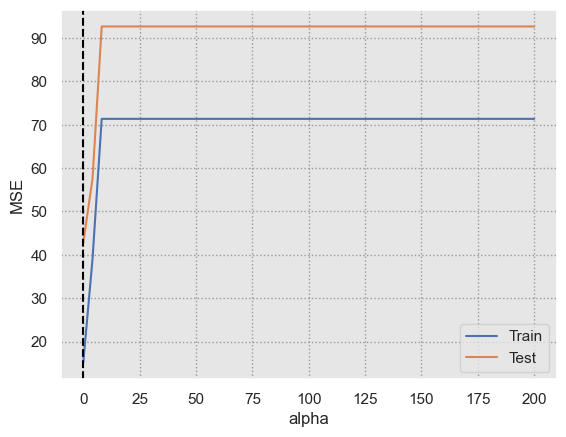

In [59]:
train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    lasso = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    lasso.fit(X_train, y_train)
    
    train_preds = lasso.predict(X_train)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

<a id='plot_optimal_Ridge_alphas'></a>
### 9E - b. [Ridge](#Table_of_Contents)

Optimal Alpha Value: 8


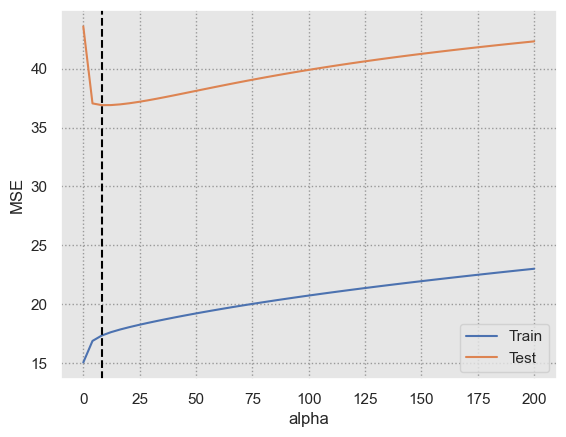

In [60]:
train_mse = []
test_mse = []
alphas = np.linspace(0, 200, num=50)

for alpha in alphas:
    ridge = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    ridge.fit(X_train, y_train)
    
    train_preds = ridge.predict(X_train)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = ridge.predict(X_test)
    test_mse.append(mean_squared_error(y_test, test_preds))

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')

<a id='test_optimal_alphas'></a>
### 9E - c. [Test optimal alphas from plots](#Table_of_Contents)

In [61]:
get_rmse(X_train, X_test, Lasso(alpha=0))

6.545520231720073

In [62]:
get_rmse(X_train, X_test, Ridge(alpha=8))

6.074428900049834

<div class="alert alert-block alert-info">
<b>Plot alphas notes:</b> There is no improvement using a manual search. I will stick to the automatically selected values. 
</div>

<a id='rmses_comparisons'></a>
## 9 - F. [Get additional RMSE's comparisons](#Table_of_Contents)

Reduce `X_train` to just the cumulative features to see if there is an improvement.
- `Hits Sum`, 
- `Runs Batted In Sum`
- `Games Played Sum`
- `At Bats Sum`
- `Runs Sum`
- `Doubles Sum`
- `Triples Sum`
- `Home Runs Sum`
- `Walks Sum`
- `Strikeouts Sum`
- `Stolen Bases Sum`
- `Caught Stealing Sum`

In [63]:
# reduce to just cumulative sums
X_train_sum = X_train[sumz.drop(target, axis=1).columns]
X_test_sum = X_test[sumz.drop(target, axis=1).columns]

# compare
compare_rmses(X_train_sum, X_test_sum)

RidgeCV() rmse:			6.048666345049738
LassoCV() rmse:			5.84469104287651
LinearRegression() rmse:	6.000390901490906


Reduce `X_train` to just the cumulative features left AFTER heatmap cuts.
- `Games Played Sum`
- `At Bats Sum`
- `Runs Sum`
- `Doubles Sum`
- `Triples Sum`
- `Home Runs Sum`
- `Walks Sum`
- `Strikeouts Sum`
- `Stolen Bases Sum`
- `Caught Stealing Sum`

In [64]:
compare_rmses(X_train[X_train_s_r.columns], X_test[X_train_s_r.columns])

RidgeCV() rmse:			6.0598572600893785
LassoCV() rmse:			5.866461018913089
LinearRegression() rmse:	6.076677429513871


Reduce `X_train` to just the features that made it into the final Linear Regression model.
- `Runs Sum`
- `Walks Sum`
- `Strikeouts Sum`


In [65]:
compare_rmses(X_train[feats], X_test[feats])

RidgeCV() rmse:			5.816366647123051
LassoCV() rmse:			5.814338819118407
LinearRegression() rmse:	5.812752574210284


Reduce `X_train` to just the one most correlated feature to `% wins` 
- `Runs Sum`


In [66]:
compare_rmses(X_train[['Runs Sum']], X_test[['Runs Sum']])

RidgeCV() rmse:			6.373948545890253
LassoCV() rmse:			6.3756014274341855
LinearRegression() rmse:	6.375864829436179


<div class="alert alert-block alert-info">
<b>RMSE notes:</b> There is too much noise with other features added to improve the error of the model. Lasso reegression did a really good job using all cumulative features, almost the same RMSE as the simpler Linear Regression model. 
    
CONCLUSION: Linear Regression model with 3 features - `Runs Sum`, `Walks Sum`, `Strikeouts Sum` - is the best model for both predictive and inferential purposes. 
</div>

<a id='predictions'></a>
# 10. [Utilizing the model](#Table_of_Contents)

<a id='predictions-functions'></a>
## 10 - A. [Functions](#Table_of_Contents)
I will be repeating a lot of these steps so I will make a couple funtions to help with flow and keep the notebook tidy.

In [67]:
def make_pred(df):
    # get the same columns I fit scaler to
    df_X = df[X_train_scaled.columns] 

    # scale and convert to df
    df_X_scaled = pd.DataFrame(scaler.transform(df_X), columns=df_X.columns)

    # reduce scaled X down to final model feats
    pred_this = df_X_scaled[feats]

    # get models prediction for sf giants 2022 season % wins 
    prediction = reg.predict(pred_this)[0][0]
    
    return prediction

In [68]:
def agg_team_stats(df):   
    # cumulative totals - avoid stats that are combined (ie formulas, ex. avg, obp, slg)
    g_sum = df['Games Played'].sum()
    ab_sum = df['At Bats'].sum()
    runs_sum = df['Runs'].sum()
    hits_sum = df['Hits'].sum()
    b2_sum = df['Doubles'].sum()
    b3_sum = df['Triples'].sum()
    hr_sum = df['Home Runs'].sum()
    rbi_sum = df['Runs Batted In'].sum()
    walks_sum = df['Walks'].sum()
    so_sum = df['Strikeouts'].sum()
    stolen_sum = df['Stolen Bases'].sum()
    cs_sum = df['Caught Stealing'].sum()

    # averages 
    g_mean = df['Games Played'].mean()
    ab_mean = df['At Bats'].mean()
    runs_mean = df['Runs'].mean()
    hits_mean = df['Hits'].mean()
    b2_mean = df['Doubles'].mean()
    b3_mean = df['Triples'].mean()
    hr_mean = df['Home Runs'].mean()
    rbi_mean = df['Runs Batted In'].mean()
    walks_mean = df['Walks'].mean()
    so_mean = df['Strikeouts'].mean()
    stolen_mean = df['Stolen Bases'].mean()
    cs_mean = df['Caught Stealing'].mean()


    convert = [g_sum,
               ab_sum,
               runs_sum,
               hits_sum,
               b2_sum, 
               b3_sum, 
               hr_sum,
               rbi_sum,
               walks_sum,
               so_sum,
               stolen_sum,
               cs_sum, 
               g_mean, 
               ab_mean, 
               runs_mean, 
               hits_mean, 
               b2_mean, 
               b3_mean, 
               hr_mean, 
               rbi_mean, 
               walks_mean, 
               so_mean, 
               stolen_mean, 
               cs_mean]

    cols = ['Games Played Sum',
            'At Bats Sum', 
            'Runs Sum',
            'Hits Sum',
            'Doubles Sum',
            'Triples Sum',
            'Home Runs Sum',
            'Runs Batted In Sum',
            'Walks Sum',
            'Strikeouts Sum',
            'Stolen Bases Sum',
            'Caught Stealing Sum',
            'Mean Games Played',
            'Mean At Bats',
            'Mean Runs',
            'Mean Hits',
            'Mean Doubles',
            'Mean Triples',
            'Mean Home Runs',
            'Mean Runs Batted In',
            'Mean Walks',
            'Mean Strikeouts',
            'Mean Stolen Bases',
            'Mean Caught Stealing']

    aggregated_df = pd.DataFrame(convert).T
    aggregated_df.columns = cols

    return aggregated_df

<a id='predictions-sf_giants_22'></a>
## 10 - B. [Check SF Giants 2022 regular season prediction](#Table_of_Contents)
Check the models prediction on SF Giants 2022 regular season

In [69]:
sfg = whole[whole['Team']=='SF'] # grab SF Giants
sfg_22 = sfg[sfg['Year']=='2022'] # get the 2022 season

# get models prediction for sf giants 2022 season % wins 
models_prediction = make_pred(sfg_22)

# actual sf giants 2022 season % wins
actual = list(sfg_22[target])[0]

# models error
models_error = round(np.abs(actual-models_prediction),2)

print(f"""
The model's prediction for the percentage of wins for the
SF Giant's 2022 regular season is {models_prediction}%.

The SF Giant's actual win percentage for the 2022 regular
season is {actual}%.

This model's error is ~{models_error}%
""")


The model's prediction for the percentage of wins for the
SF Giant's 2022 regular season is 47.7539325923143%.

The SF Giant's actual win percentage for the 2022 regular
season is 50.0%.

This model's error is ~2.25%



<div class="alert alert-block alert-info">
<b>SF Giants 2022 regular season notes:</b> This model under-predicted the SF Giants 2022 regular season by 2.25% (note this is within the 5.81 RMSE range). </div> 

<a id='predictions-sf_giants_23'></a>
## 10 - C. [Make SF Giants 2023 regular season prediction](#Table_of_Contents)
Below I will consolidate the 2022 regular season stats from players on this year's (2023) roster. I will then aggregate all the hitters into a single team in the same way I did with the 5 seasons of teams. I will use this to make a prediction for the SF Giants 2023 regular season percentage of wins. 

One obvious issue is that this year's players played on several teams last year, artificially raising the games played and at bats. This could have a negative impact on the prediction as these features are strongly correlated with runs and therefore win percentage. I will account for this by taking the mean number of games played, over the 5 seasons of data I have collected, to offset the teams inflated numbers. 

<a id='predictions-web_scrap_roster'></a>
### 10C - a. [Get 2023 roster (web scrap)](#Table_of_Contents)
Below I will do one final web scraping, hopefully, to get the 2023 SF Giants roster.

  - **To bypass this step when re running notebook skip to next cell**
  
I am scraping from [Baseball America](https://www.baseballamerica.com/teams/1018/san-francisco-giants/roster/)

In [70]:
# BY PASS THIS CELL WHEN RE RUNNING NOTEBOOK, 
# LOAD DF IN NEXT CELL

import pandas as pd
import requests
from bs4 import BeautifulSoup

headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

sf_23_url = 'https://www.baseballamerica.com/teams/1018/san-francisco-giants/roster/'


response = requests.get(sf_23_url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# find the table from website (see above screen shot)
table = soup.find('div', class_ = 'table-container')

# convert to pandas df
SF_23_roster_df = pd.read_html(str(table))[0]

# pickle 
pd.to_pickle(SF_23_roster_df, "../pickled_tables/SF_23_roster_df.pkl")

# display the df
SF_23_roster_df

,0,1,2,3,4,5,6,7,8,9
0,Pitchers,Pitchers,Pitchers,Pitchers,Pitchers,Pitchers,Pitchers,Pitchers,Pitchers,Pitchers
1,NO.,PLAYER,POS,B,T,HT,WT,AGE,BIRTHDAY,40-Man
2,54,Scott Alexander,LHP,L,L,"6'2""",195,33,"Jul 10, 1989",Yes
3,43,Tristan Beck,RHP,R,R,"6'4""",199,26,"Jun 24, 1996",Yes
4,59,John Brebbia,RHP,R,R,"6'1""",185,32,"May 30, 1990",Yes
5,38,Alex Cobb,RHP,R,R,"6'3""",205,35,"Oct 7, 1987",Yes
6,68,Jose Cruz,RHP,R,R,"6'1""",178,22,"May 18, 2000",Yes
7,26,Anthony DeSclafani,RHP,R,R,"6'1""",195,32,"Apr 18, 1990",Yes
8,75,Camilo Doval,RHP,R,R,"6'2""",198,25,"Jul 4, 1997",Yes
9,64,Sean Hjelle,RHP,R,R,"6'11""",230,25,"May 7, 1997",Yes


<a id='predictions-load_pickled_df'></a>
### 10C - b. [Load 2023 roster (pickled roster df)](#Table_of_Contents)

Load the above pickled df.

In [71]:
# load
SF_23_roster_df = pd.read_pickle("../pickled_tables/SF_23_roster_df.pkl")

<a id='predictions-trim'></a>
### 10C - c. [Trim to get just the hitters](#Table_of_Contents)
Drop the pitchers, and header rows, to get just the hitters.

In [72]:
# drop top half, they are pitchers
drop_pitchers = SF_23_roster_df[23:]

# exclude the header rows
sf_hitters = drop_pitchers[(drop_pitchers[0]!= 'Catchers')&
                           (drop_pitchers[0]!= 'Infielders')&
                           (drop_pitchers[0]!= 'Outfielders')&
                           (drop_pitchers[0]!= 'NO.')]
list(sf_hitters[1])

['Joey Bart',
 'Blake Sabol',
 'Brandon Crawford',
 'J.D. Davis',
 'Isan Diaz',
 'Thairo Estrada',
 'Wilmer Flores',
 'Marco Luciano',
 'David Villar',
 'Brett Wisely',
 'Michael Conforto',
 'Luis Gonzalez',
 'Mitch Haniger',
 'Luis Matos',
 'Joc Pederson',
 'Austin Slater',
 'LaMonte Wade',
 'Mike Yastrzemski',
 'Other Inactive',
 'Heliot Ramos',
 'Randy Rodriguez']

<a id='predictions-load_2022_stats'></a>
### 10C - d. [Load 2022 player stats](#Table_of_Contents)
Load 2022 stats from Major, Minor, and Collegiate leagues. 

In [73]:
# save just 2022 major league stats
major = pd.read_pickle("../pickled_tables/MLB_5_seasons_df.pkl")
major_22 = major[major["Year"]=='2022']

# load minor df - reminder this is qualified players only from 2022
minor = pd.read_pickle("../pickled_tables/MiLB_df.pkl")

# load college df - reminder this is all division 1 collegiate players
college = pd.read_pickle("../pickled_tables/College_df.pkl")

<a id='predictions-find_players'></a>
### 10C - e. [Find players on 2023 SF roster](#Table_of_Contents)

In [74]:
# get all the names from minor df
minor_names = []
for index, row in minor.iterrows():
    name = row['First Name']+" "+row['Last Name']
    minor_names.append(name)

# get all the names from college df
college_names = []
for index, row in college.iterrows():
    name = row['First Name']+" "+row['Last Name']
    college_names.append(name)

# get all the names form the MLB 2022 season
major_names = [name for name in major_22['Player Name']]

# A quick little function to help me find players
# print players names and where their stats can be found
def find_player(player):
    if len([name for name in major_names if player in name])>0:
        print(f"MAJOR: {[name for name in major_names if player in name]}")
    if len([name for name in minor_names if player in name])>0:
        print(f"MINOR: {[name for name in minor_names if player in name]}")
    if len([name for name in college_names if player in name])>0:
        print(f"COLLEGE: {[name for name in college_names if player in name]}")

In [75]:
for name in list(sf_hitters[1]):
    find_player(name)

MINOR: ['Heliot Ramos']


<div class="alert alert-block alert-danger">
<b>What happened?:</b> That's weird that only one name printed. I need to check one name at a time to figure out what went wrong. 
</div>


Check for just last name of first player, "Bart"

In [76]:
find_player('Bart')

MAJOR: ['Joey  Bart ']
COLLEGE: ['Bart West', 'Cameron Barto', 'Cole Bartels', 'Tommy Barth', 'Caleb Bartolero', 'Charlie Bartholomew', 'Blake Barton']


<div class="alert alert-block alert-warning">
<b>What happened?:</b> I see that in my MLB player names there is an extra space between first and last names, as well as an extra space at the end of the name. I need to fix this before moving on. 
</div>

Remove extra spaces between names and the extra space at end of names.

In [77]:
major_22_fixed = []
for name in major_names:
    # step_1 is remove last extra space
    if name[-1] == " ":
        name = name[:-1]
    step_2 = name.replace("  ", " ")
    major_22_fixed.append(step_2)
    
major_22_fixed

['Khalil Lee',
 'Chadwick Tromp',
 'James Outman',
 'Otto Lopez',
 'Matt Carpenter',
 'Aaron Judge',
 'Joe Dunand',
 'David Hensley',
 'Yordan Alvarez',
 'Rob Brantly',
 'Evan Phillips',
 'Mike Trout',
 'Livan Soto',
 'Paul Goldschmidt',
 'Dalton Guthrie',
 'Sean Bouchard',
 'Joey Meneses',
 'Jose Altuve',
 'Freddie Freeman',
 'Will Brennan',
 'Manny Machado',
 'Albert Pujols',
 'Tom Murphy',
 'Nolan Arenado',
 'Rob Refsnyder',
 'Rafael Devers',
 'Bryce Harper',
 'Austin Riley',
 'Conner Capel',
 'Shohei Ohtani',
 'Joc Pederson',
 'Mookie Betts',
 'Pete Alonso',
 'Jose Ramirez',
 'Royce Lewis',
 'Jazz Chisholm Jr.',
 'William Contreras',
 'Trayce Thompson',
 'Eloy Jimenez',
 'Danny Jansen',
 'Nick Maton',
 'Julio Rodriguez',
 'Tyler Stephenson',
 'Michael Harris II',
 'Juan Soto',
 'Kris Bryant',
 'Nathaniel Lowe',
 'Stone Garrett',
 'Andres Gimenez',
 'Jeff McNeil',
 'Xander Bogaerts',
 'Carlos Correa',
 "Brian O'Keefe",
 'Vinnie Pasquantino',
 'Liover Peguero',
 'Oswald Peraza',
 'Ta

<div class="alert alert-block alert-success">
<b>Success:</b> The extra space at end of the names have been removed, and the double spaces between names have been replaced by a single space. I can now replace `Player Name` colunm in major_22 df with the fixed names. 
</div>

In [78]:
major_22['Player Name'] = major_22_fixed

# replace all the names form the MLB 2022 season
major_names = [name for name in major_22['Player Name']]

Now that names have been corrected run loop with `find_player` function again.

In [79]:
for name in list(sf_hitters[1]):
    print(name)
    find_player(name)
    print()

Joey Bart
MAJOR: ['Joey Bart']

Blake Sabol

Brandon Crawford
MAJOR: ['Brandon Crawford']

J.D. Davis
MAJOR: ['J.D. Davis']

Isan Diaz

Thairo Estrada
MAJOR: ['Thairo Estrada']

Wilmer Flores
MAJOR: ['Wilmer Flores']

Marco Luciano

David Villar
MAJOR: ['David Villar']

Brett Wisely

Michael Conforto

Luis Gonzalez
MAJOR: ['Luis Gonzalez']

Mitch Haniger
MAJOR: ['Mitch Haniger']

Luis Matos

Joc Pederson
MAJOR: ['Joc Pederson']

Austin Slater
MAJOR: ['Austin Slater']

LaMonte Wade
MAJOR: ['LaMonte Wade Jr.']

Mike Yastrzemski
MAJOR: ['Mike Yastrzemski']

Other Inactive

Heliot Ramos
MAJOR: ['Heliot Ramos']
MINOR: ['Heliot Ramos']

Randy Rodriguez



<a id='predictions-SF_2023_players_2022_stats'></a>
### 10C - f. [Create SF Giants 2023 roster stats df](#Table_of_Contents)


Get SF Giants 2023 hitters (ie not pitchers) stats from 2022

In [80]:
sf_23_predictions = major_22[(major_22['Player Name']=='Joey Bart')|
                             (major_22['Player Name']=='Brandon Crawford')|
                             (major_22['Player Name']=='J.D. Davis')|
                             (major_22['Player Name']=='Thairo Estrada')|
                             (major_22['Player Name']=='David Villar')|
                             (major_22['Player Name']=='Wilmer Flores')|
                             (major_22['Player Name']=='Luis Gonzalez')|
                             (major_22['Player Name']=='Mitch Haniger')|
                             (major_22['Player Name']=='Joc Pederson')|
                             (major_22['Player Name']=='Heliot Ramos')|
                             (major_22['Player Name']=='Austin Slater')|
                             (major_22['Player Name']=='LaMonte Wade Jr.')|
                             (major_22['Player Name']=='Mike Yastrzemski')]
sf_23_predictions

,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Year,Player Name,Position
30,SF,134,380,57,104,19,3,23,70,42,100,3,2,0.274,0.353,0.521,0.874,2022,Joc Pederson,LF
111,SF,52,156,21,36,6,1,9,24,18,58,0,1,0.231,0.331,0.455,0.786,2022,David Villar,3B
118,SF,125,277,49,73,15,2,7,34,40,89,12,1,0.264,0.366,0.408,0.774,2022,Austin Slater,CF
142,SF,115,318,46,79,16,1,12,35,39,122,1,1,0.248,0.340,0.418,0.758,2022,J.D. Davis,3B
177,SEA,57,224,31,55,8,0,11,34,20,65,0,0,0.246,0.308,0.429,0.737,2022,Mitch Haniger,RF
210,SF,140,488,71,127,22,2,14,62,33,89,21,6,0.260,0.322,0.400,0.722,2022,Thairo Estrada,2B
229,SF,151,525,72,120,28,1,19,71,59,103,0,0,0.229,0.316,0.394,0.710,2022,Wilmer Flores,2B
262,SF,148,485,73,104,31,2,17,57,61,141,5,1,0.214,0.305,0.392,0.697,2022,Mike Yastrzemski,RF
288,SF,98,311,31,79,17,2,4,36,30,75,10,2,0.254,0.323,0.360,0.683,2022,Luis Gonzalez,RF
323,SF,77,217,29,45,7,1,8,26,26,51,1,0,0.207,0.305,0.359,0.664,2022,LaMonte Wade Jr.,RF


<div class="alert alert-block alert-info">
<b>Create SF Giants 2023 roster stats df notes:</b> Only 'Heliot Ramos' came up in minors (see: 8Db - v. Find players on 2023 SF roster). This means the remaining players were not included in my web scraping of qualified players only. I will need to manually collect those stats and join them to the existing MLB players that I already have. Additionally, several of our 2023 players played on multiple teams last year. If the additional team was a minor league team, those minor league stats do not carry over to their MLB stats. I will have to manually check each player's 2022 stats to ensure I have all relevant data.
</div>

Add 2022 minor league stats for all SF 2023 roster.

In [81]:
add_Crawford = pd.DataFrame(['SAC',2,4,0,0,0,0,0,0,1,1,0,0,
                             .000,.200,.000,.200, '2022', 'Brandon Crawford', 'SS'], 
                             index=sf_23_predictions.columns).T

add_Bart = pd.DataFrame(['SAC',7,28,5,8,0,0,1,4,2,6,0,0,
                         .286,.355,.393,.748,'2022', 'Joey Bart', 'C'], 
                         index=sf_23_predictions.columns).T

add_Sabol = pd.DataFrame(['IND', 25, 81, 13, 24, 3, 1, 5, 15, 17, 22, 1, 0, 
                          .296, .426, .543, .969, '2022', 'Blake Sabol', 'LF'], 
                          index=sf_23_predictions.columns).T

add_Sabol2 = pd.DataFrame(['ALT',98,366,61,103,23,5,14,60,38,107,9,2,
                           .281,.347,.486,.833,'2022', 'Blake Sabol', 'LF'], 
                           index=sf_23_predictions.columns).T

add_Isan = pd.DataFrame(['JAX',2,7,0,0,0,0,0,0,1,6,0,0,.000,
                         .125,.000,.125, '2022', 'Isan Diaz', '2B'], 
                         index=sf_23_predictions.columns).T

add_Isan2 = pd.DataFrame(['SAC',83,284,60,78,12,2,23,61,43,82,7,2,
                          .275,.377,.574,.951, '2022', 'Isan Diaz', '2B'], 
                          index=sf_23_predictions.columns).T

add_Isan3 = pd.DataFrame(['JUP',2,5,0,0,0,0,0,0,1,2,0,0,
                          .000,.167,.000,.167, '2022', 'Isan Diaz', '2B'], 
                          index=sf_23_predictions.columns).T

add_Luciano = pd.DataFrame(['EUG',57,205,27,54,10,0,10,30,22,51,0,0,
                            .263,.339,.459,.798, '2022', 'Marco Luciano', 'SS'], 
                            index=sf_23_predictions.columns).T

add_Luciano2 = pd.DataFrame(['GNTB',8,22,6,7,2,0,1,6,4,7,0,0,
                             .318,.444,.545,.989,'2022', 'Marco Luciano', 'SS'], 
                             index=sf_23_predictions.columns).T

add_Wisely = pd.DataFrame(['DUR',5,21,3,5,2,0,0,2,1,6,1,0,
                           .238,.261,.333,.594,'2022', 'Brett Wisely', '2B'],
                           index=sf_23_predictions.columns).T

add_Wisely2 = pd.DataFrame(['MTG',112,430,84,118,23,6,15,56,62,104,31,11,
                            .274,.371,.460,.831,'2022', 'Brett Wisely', '2B'],
                            index=sf_23_predictions.columns).T

add_Matos = pd.DataFrame(['EUG',91,369,55,78,14,1,11,43,27,65,11,3,
                          .211,.275,.344,.619, '2022', 'Luis Matos', 'CF'], 
                          index=sf_23_predictions.columns).T

add_Matos2 = pd.DataFrame(['GNTB',2,7,3,3,1,0,1,4,1,1,0,0,
                           .429,.500,1.000,1.500, '2022', 'Luis Matos', 'CF'], 
                          index=sf_23_predictions.columns).T

add_Villar = pd.DataFrame(['SAC',84,298,67,82,19,1,27,82,55,93,1,1,
                           .275,.404,.617,1.021, '2022', 'David Villar', '3B'], 
                          index=sf_23_predictions.columns).T

add_Gonzalez = pd.DataFrame(['SAC',20,76,15,22,1,0,6,13,15,22,4,2,
                             .289,.402,.539,.941,'2022', 'Luis Gonzalez', 'CF'], 
                             index=sf_23_predictions.columns).T 

add_Haniger = pd.DataFrame(['TAC',8,21,5,5,0,0,2,6,10,3,0,0,
                            .238,.515,.524,1.039, '2022','MitchHaniger', 'RF'], 
                             index=sf_23_predictions.columns).T 

add_Ramos = pd.DataFrame(['SAC',108,427,61,97,17,1,11,45,41,112,6,6,
                          .227,.305,.349,.654, '2022', 'Heliot Ramos','CF'], 
                             index=sf_23_predictions.columns).T 

add_Wade = pd.DataFrame(['SAC',14,44,11,11,4,0,2,11,10,6,0,0,
                         .250,.397,.477,.874,'2022', 'LaMonte Wade', 'LF'], 
                         index=sf_23_predictions.columns).T 


sf_23_raw = pd.concat([sf_23_predictions, 
                               add_Crawford, 
                               add_Bart, 
                               add_Sabol, 
                               add_Sabol2, 
                               add_Isan, 
                               add_Isan2, 
                               add_Isan3, 
                               add_Luciano, 
                               add_Luciano2, 
                               add_Wisely, 
                               add_Wisely2, 
                               add_Matos, 
                               add_Matos2, 
                               add_Villar, 
                               add_Gonzalez, 
                               add_Haniger, 
                               add_Ramos, 
                               add_Wade], ignore_index=True)

sf_23_raw

,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Year,Player Name,Position
0,SF,134,380,57,104,19,3,23,70,42,100,3,2,0.274,0.353,0.521,0.874,2022,Joc Pederson,LF
1,SF,52,156,21,36,6,1,9,24,18,58,0,1,0.231,0.331,0.455,0.786,2022,David Villar,3B
2,SF,125,277,49,73,15,2,7,34,40,89,12,1,0.264,0.366,0.408,0.774,2022,Austin Slater,CF
3,SF,115,318,46,79,16,1,12,35,39,122,1,1,0.248,0.34,0.418,0.758,2022,J.D. Davis,3B
4,SEA,57,224,31,55,8,0,11,34,20,65,0,0,0.246,0.308,0.429,0.737,2022,Mitch Haniger,RF
5,SF,140,488,71,127,22,2,14,62,33,89,21,6,0.26,0.322,0.4,0.722,2022,Thairo Estrada,2B
6,SF,151,525,72,120,28,1,19,71,59,103,0,0,0.229,0.316,0.394,0.71,2022,Wilmer Flores,2B
7,SF,148,485,73,104,31,2,17,57,61,141,5,1,0.214,0.305,0.392,0.697,2022,Mike Yastrzemski,RF
8,SF,98,311,31,79,17,2,4,36,30,75,10,2,0.254,0.323,0.36,0.683,2022,Luis Gonzalez,RF
9,SF,77,217,29,45,7,1,8,26,26,51,1,0,0.207,0.305,0.359,0.664,2022,LaMonte Wade Jr.,RF


In [82]:
# drop string columns (except for players name)
sf_23_predictions = sf_23_raw.drop(['Year', 'Position', 'Team'], axis=1)

In [83]:
# consolidate players

# initiate empty list to hold temp_dfs
# each df is a different player
consol_players_dfs = []

# for each (unique) player name
for player in sf_23_predictions['Player Name'].unique():
    
    # filter player_df to get just the player
    player_df = sf_23_predictions[sf_23_predictions['Player Name'] == player]
    
    # make a temporary df excluding 'Player Name'
    temp_df = pd.DataFrame(columns=player_df.columns[:-1])
    
    # initiate and empty list to hold the players stats
    player_stats = []
    
    # for each type of stat
    for col in temp_df.columns:
        
        # sum the stats
        col_sum = player_df[col].sum()
        
        # append the sum to `player_stats` list
        player_stats.append(col_sum)
    
    # use the stored stats from `player_stats` to add a new row to `temp_df`
    temp_df.loc[0] = player_stats
    
    # add `Player Name` temp_df
    temp_df["Player Name"] = player
    
    # append temp_df to `consol_players_dfs`
    consol_players_dfs.append(temp_df)
    
# concat all the players dfs into one team df
giants_2023_hitters = pd.concat(consol_players_dfs, ignore_index=True)
giants_2023_hitters

,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Player Name
0,134.0,380.0,57.0,104.0,19.0,3.0,23.0,70.0,42.0,100.0,3.0,2.0,0.274,0.353,0.521,0.874,Joc Pederson
1,136.0,454.0,88.0,118.0,25.0,2.0,36.0,106.0,73.0,151.0,1.0,2.0,0.506,0.735,1.072,1.807,David Villar
2,125.0,277.0,49.0,73.0,15.0,2.0,7.0,34.0,40.0,89.0,12.0,1.0,0.264,0.366,0.408,0.774,Austin Slater
3,115.0,318.0,46.0,79.0,16.0,1.0,12.0,35.0,39.0,122.0,1.0,1.0,0.248,0.340,0.418,0.758,J.D. Davis
4,57.0,224.0,31.0,55.0,8.0,0.0,11.0,34.0,20.0,65.0,0.0,0.0,0.246,0.308,0.429,0.737,Mitch Haniger
5,140.0,488.0,71.0,127.0,22.0,2.0,14.0,62.0,33.0,89.0,21.0,6.0,0.260,0.322,0.400,0.722,Thairo Estrada
6,151.0,525.0,72.0,120.0,28.0,1.0,19.0,71.0,59.0,103.0,0.0,0.0,0.229,0.316,0.394,0.710,Wilmer Flores
7,148.0,485.0,73.0,104.0,31.0,2.0,17.0,57.0,61.0,141.0,5.0,1.0,0.214,0.305,0.392,0.697,Mike Yastrzemski
8,118.0,387.0,46.0,101.0,18.0,2.0,10.0,49.0,45.0,97.0,14.0,4.0,0.543,0.725,0.899,1.624,Luis Gonzalez
9,77.0,217.0,29.0,45.0,7.0,1.0,8.0,26.0,26.0,51.0,1.0,0.0,0.207,0.305,0.359,0.664,LaMonte Wade Jr.


<a id='predictions-agg_team_stats'></a>
### 10C - g. [Aggregate team stats (into 1 line df)](#Table_of_Contents)

In [84]:
Giants_2023 = agg_team_stats(giants_2023_hitters)
Giants_2023

,Games Played Sum,At Bats Sum,Runs Sum,Hits Sum,Doubles Sum,Triples Sum,Home Runs Sum,Runs Batted In Sum,Walks Sum,Strikeouts Sum,...,Mean Runs,Mean Hits,Mean Doubles,Mean Triples,Mean Home Runs,Mean Runs Batted In,Mean Walks,Mean Strikeouts,Mean Stolen Bases,Mean Caught Stealing
0,2049.0,6764.0,1044.0,1669.0,321.0,34.0,273.0,964.0,786.0,1805.0,...,52.2,83.45,16.05,1.7,13.65,48.2,39.3,90.25,6.35,2.15


<a id='predictions-pred_2023'></a>
### 10C - h. [Make predictions for 2023 win percentage](#Table_of_Contents)

In [85]:
models_23_prediction = make_pred(Giants_2023)
models_23_prediction

67.1040865530805

<div class="alert alert-block alert-warning">
<b>Warning:</b> There is an inherent limitation to this prediction in that it is using last year's stats. I cannot get around this limitation. There is a second limitation, the number of games played is inflated due to players playing on so many teams last year. I can attempt to compensate for the resulting inflated stats by taking the mean number of games played from the last 5 seasons and dividing it by the teams total games played in 2022. This will give me a conversion rate to multiple each stat by.
</div>



<a id='predictions-regulation'></a>
### 10C - i. [Add a regulation to inflated numbers in aggrigated team stats](#Table_of_Contents)

I am using the mean of `Games Played Sum` rather than `At Bats Sum` because at bats could be artificially inflated by longer games. A reminder that `Games Played Sum` is an aggregated team stat, and is the cumulative sum of games played by the players on a team. I suppose it is pertinent to specify, this cumulative mean only includes MLB games and not Minor league appearances as does my SF Giants 2023 roster stats.

In [86]:
conversion = df['Games Played Sum'].mean()/Giants_2023['Games Played Sum']
conversion

0    0.862151
Name: Games Played Sum, dtype: float64

<a id='predictions-final_pred'></a>
### 10C - j. [Final prediciton for 2023 SF Giants regular season win percentage](#Table_of_Contents)

In [87]:
copy_of_Giants_2023 = Giants_2023.copy()

for col in Giants_2023.columns:
    copy_of_Giants_2023[col] = Giants_2023[col]*conversion

models_prediction_for_2023_season = make_pred(copy_of_Giants_2023)
models_prediction_for_2023_season

60.18449553514759

<div class="alert alert-block alert-info">
<b>SF Giants 2023 win pred notes:</b> This model predicts the SF Giants current roster will deliver wins in 60.18% of their 2023 regular season games. To put this into perspective, this is a 10% improvement over last year's 50% wins. In fact, this is the second highest win percentage in the last 5 seasons, beaten only by the 2021 season, when the SF Giants were 1st NL West with 66.05%.

With this same format, I could feed in fantasy rosters, of any set of players, and make predictions on next year's win percentage.
</div>

<a id='predictions-fantasy'></a>
## 10 - D. [Make SF Giants fantasy roster prediction](#Table_of_Contents)
The above is only part of utilizing the model. It's real value comes form checking how roster change ups can potentially impact a teams win percentage. Below is an example of how the model can be used for recruitment and testing hypothetical rosters.

<a id='predictions-recruitment'></a>
### 10D - a. [Recruitment](#Table_of_Contents)
The model showed that the 2 most significant stats that impact a teams win percentage are `Runs` and `Strikeouts`, with `Runs` having a positive impact and `Strikeouts` having a negative impact. This means the most impactful players will have not just high number of runs but will also have, relative to their number of runs, low strikeouts. So rather then searching for just the most runs or the least strikeouts, I want to find the players with the greatest number of runs after strikeouts are subtracted.

In [88]:
# get minor league players that didn't make it to MLB last year        
minor_rows = [index for index, row in minor.iterrows()\
              if row['First Name']+" "+row['Last Name'] not in major_22['Player Name']]       

# get top 50 hitters
test_minor = minor.loc[minor_rows].sort_values(['Runs'], ascending=False)[:50]

# filter out columns to just relevant stats and info to find player
test_minor = test_minor[['Team', 'Runs', 'Walks', 'Strikeouts', 'First Name', 'Last Name', 'Position']]

# calculate difference between runs and strikeouts
diffs = [(row['Runs'] - row['Strikeouts']) for _, row in test_minor.iterrows()]

# add difference to test_minor
test_minor['RSO'] = diffs

# get top 3 players with more runs than strikeouts
top_3 = test_minor.sort_values(['RSO'], ascending=False)[:3]

names = [row['First Name']+" "+row['Last Name'] for _, row in top_3.iterrows()]

top_3['Player Name'] = names

top_3[['Team', 'Runs', 'Walks', 'Strikeouts', 'Player Name', 'Position', 'RSO']]

,Team,Runs,Walks,Strikeouts,Player Name,Position,RSO
0,ABQ,95,39,67,Wynton Bernard,CF,28
54,OKC,100,71,76,Miguel Vargas,3B,24
22,ELP,73,38,58,Brett Sullivan,C,15


In [89]:
# check there are not duplicates of these players on minor teams (ie they played on multiple teams)
keep_these_players = []
for last in top_3['Last Name']:
    display(minor[minor['Last Name']==last])
    keep_these_players.append(minor[minor['Last Name']==last])

,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,First Name,Last Name,Position
0,ABQ,108,429,95,143,31,8,21,92,39,67,30,5,.333,.387,.590,.977,Wynton,Bernard,CF


,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,First Name,Last Name,Position
54,OKC,113,438,100,133,32,4,17,82,71,76,16,5,.304,.404,.511,.915,Miguel,Vargas,3B


,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,First Name,Last Name,Position
22,ELP,113,421,73,120,28,6,9,81,38,58,3,0,.285,.339,.444,.783,Brett,Sullivan,C


<div class="alert alert-block alert-info">
<b>Recruitment notes:</b> From the webscrapped minor league qualified players, these three players have the highest number of runs after strikeouts are removed. They will likely have the most significant positive impact to a teams win percentage. 
    
It may be beneficial to consolidate players stats from all the minor league teams they have played on, but without extensive knowledge of all the players, it would be dangerous to run a similar code as above that used players names to consolidate stat, as there may be players with same name. If that knowledge were made available to me I could go back and scrap minor stats WITHOUT limiting the player pool to 'qualified players only' then consolidate a players stats into one annual total, including all minor league teams they played on.  
</div>

<a id='predictions-Testing_a_hypothetical_roster'></a>
### 10D - b. [Testing a hypothetical roster](#Table_of_Contents)
With the above 3 recruitment recommendations we can swap out 3 of the current roster players - 1 center fielder, 1 3rd baseman, and 1 Catcher. To do this I will narrow down the team df to just those positions, then calculate those players runs minus strikeouts. 

In [90]:
# swap out players form current roster, 1 center fielder, 1 3rd baseman, and 1 Catcher
current = sf_23_raw[['Team', 'Runs', 'Walks', 'Strikeouts', 'Player Name', 'Position']]
replace = current[(current['Position']== 'CF') |
                  (current['Position']== '3B') | 
                  (current['Position']== 'C')]

# calculate difference between runs and strikeouts
differences = [(row['Runs'] - row['Strikeouts']) for _, row in replace.iterrows()]

# add difference of `Runs` and `Strikeouts` to replace df
replace['RSO'] = differences

replace.sort_values(['RSO'], ascending=False)

,Team,Runs,Walks,Strikeouts,Player Name,Position,RSO
25,GNTB,3,1,1,Luis Matos,CF,2
14,SAC,5,2,6,Joey Bart,C,-1
27,SAC,15,15,22,Luis Gonzalez,CF,-7
24,EUG,55,27,65,Luis Matos,CF,-10
26,SAC,67,55,93,David Villar,3B,-26
1,SF,21,18,58,David Villar,3B,-37
2,SF,49,40,89,Austin Slater,CF,-40
29,SAC,61,41,112,Heliot Ramos,CF,-51
3,SF,46,39,122,J.D. Davis,3B,-76
10,SF,34,26,112,Joey Bart,C,-78


Select 1 center fielder, 1 3rd baseman, and 1 Catcher from the above df, based on 

In [91]:
keepers = pd.concat(keep_these_players)

keepers['Player Name'] = [row['First Name']+" "+row['Last Name'] for _, row \
                          in keepers.iterrows()]

swap_these_in = keepers[giants_2023_hitters.columns]

# drop joey bart, j.d. davis, and Austin Slater
dropped = giants_2023_hitters.drop([10,3, 2])

# swap in Wynton Bernard, Miguel Vargas, Brett Sullivan
swapped = pd.concat([swap_these_in, dropped])
swapped

,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Player Name
0,108.0,429.0,95.0,143.0,31.0,8.0,21.0,92.0,39.0,67.0,30.0,5.0,.333,.387,.590,.977,Wynton Bernard
54,113.0,438.0,100.0,133.0,32.0,4.0,17.0,82.0,71.0,76.0,16.0,5.0,.304,.404,.511,.915,Miguel Vargas
22,113.0,421.0,73.0,120.0,28.0,6.0,9.0,81.0,38.0,58.0,3.0,0.0,.285,.339,.444,.783,Brett Sullivan
0,134.0,380.0,57.0,104.0,19.0,3.0,23.0,70.0,42.0,100.0,3.0,2.0,0.274,0.353,0.521,0.874,Joc Pederson
1,136.0,454.0,88.0,118.0,25.0,2.0,36.0,106.0,73.0,151.0,1.0,2.0,0.506,0.735,1.072,1.807,David Villar
4,57.0,224.0,31.0,55.0,8.0,0.0,11.0,34.0,20.0,65.0,0.0,0.0,0.246,0.308,0.429,0.737,Mitch Haniger
5,140.0,488.0,71.0,127.0,22.0,2.0,14.0,62.0,33.0,89.0,21.0,6.0,0.26,0.322,0.4,0.722,Thairo Estrada
6,151.0,525.0,72.0,120.0,28.0,1.0,19.0,71.0,59.0,103.0,0.0,0.0,0.229,0.316,0.394,0.71,Wilmer Flores
7,148.0,485.0,73.0,104.0,31.0,2.0,17.0,57.0,61.0,141.0,5.0,1.0,0.214,0.305,0.392,0.697,Mike Yastrzemski
8,118.0,387.0,46.0,101.0,18.0,2.0,10.0,49.0,45.0,97.0,14.0,4.0,0.543,0.725,0.899,1.624,Luis Gonzalez


In [92]:
swapped_2023 = agg_team_stats(swapped)
swapped_2023

,Games Played Sum,At Bats Sum,Runs Sum,Hits Sum,Doubles Sum,Triples Sum,Home Runs Sum,Runs Batted In Sum,Walks Sum,Strikeouts Sum,...,Mean Runs,Mean Hits,Mean Doubles,Mean Triples,Mean Home Runs,Mean Runs Batted In,Mean Walks,Mean Strikeouts,Mean Stolen Bases,Mean Caught Stealing
0,2039.0,7168.0,1178.0,1849.0,375.0,49.0,289.0,1121.0,827.0,1677.0,...,58.9,92.45,18.75,2.45,14.45,56.05,41.35,83.85,8.05,2.5


In [93]:
models_prediction = make_pred(swapped_2023)
models_prediction

76.28162530460473

In [94]:
conversion = df['Games Played Sum'].mean()/swapped_2023['Games Played Sum']
conversion

0    0.866379
Name: Games Played Sum, dtype: float64

In [95]:
copy_of_swapped_2023 = swapped_2023.copy()

for col in swapped_2023.columns:
    copy_of_swapped_2023[col] = swapped_2023[col]*conversion

models_prediction_for_fantasy_2023 = make_pred(copy_of_swapped_2023)
models_prediction_for_fantasy_2023

68.34796889112899

In [96]:
print(f"""
The model's regular season win percentage predictions:
 
CURRENT SF Giants roster: {round(models_prediction_for_2023_season,2)}%.
FANTASY SF Giants roster: {round(models_prediction_for_fantasy_2023,2)}%.
""")


The model's regular season win percentage predictions:
 
CURRENT SF Giants roster: 60.18%.
FANTASY SF Giants roster: 68.35%.



<div class="alert alert-block alert-info">
<b>Testing a hypothetical roster notes:</b> By swapping out 3 players the teams predicted win percentage goes up ~8%, from ~60.18% to ~68.35%
</div>

<a id='Conclusions'></a>
# 11. [Conclusions on Final Model](#Table_of_Contents)

<a id='summary_report'></a>
## 11 - A. [statsmodel OLS summary report](#Table_of_Contents)

In [97]:
fit_model(final_scaled_model_df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 % wins   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.46e-32
Time:                        17:08:27   Log-Likelihood:                -348.41
No. Observations:                 120   AIC:                             704.8
Df Residuals:                     116   BIC:                             716.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             50.1761      0.410    122.466      0.000      49.365      50.988
Runs Sum           5.7835      0.712      8.121      0.000       4.373       7.194
Strikeouts Sum    -1.8262      0.494     -3.698      0.000      -2.804      -0.848
Walks Sum          2.4333      0.777      3.132      0.002       0.895       3.972
==============================================================================
Omnibus:                        3.440   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.191
Skew:                          -0.106   Prob(JB):                        0.334
Kurtosis:                       2.373   Cond. No.                         3.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id='P_Values'></a>
### 11A - a. [P Values and confidence intervals](#Table_of_Contents)
Up until this point p-values have been the primary focus, with all features included or excluded in or from the model based on this value, more specifically, in this case, the threshold of 0.05 or greater. In the summary report, p-values are in the column `P > |t|` and rounded to 3 digits. 

Applied to a regression model, p-values associated with coefficient estimates indicate the probability of observing the associated coefficient given that the null-hypothesis is true. In this case the null hypothesis is:
There is NO relationship between the associated coefficient - "a teams cumulative runs", "a teams cumulative walks", and "a teams cumulative strikeouts" - and the the teams percentage of wins in their regular season games. 
This null hypothesis can be rejected when the p value is below 0.05.  

Rejecting the null hypothesis at an alpha level of 0.05 is the equivalent for having a 95% confidence interval around the coefficient that does not include zero. The confidence intervals are in the two last columns to the right of `P > |t|`, in this case it is 95%, derived from the shown range `[0.025 0.975]`. Using `Runs Sum` as an example: The confidence interval for `Runs Sum` is [4.373, 7.194] meaning that there is a 95% chance that the actual coefficient value is in that range. Note this is why it is important this range does not span 0, this would indicate an uncertainty of having either a positive or negative correlation, it can't be both.

As the measurement of how likely a coefficient is measured by our model through chance, p-values are undoubtedly important, however, they are not the only important metric when analyzing the statsmodel summary report.

<a id='R_squared'></a>
### 11A - b. [R squared](#Table_of_Contents)
R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In this case, the r squared value of 0.727 tells us: 

**This final linear regression model is able to explain 72.7% of the variability observed in regular season percentage of wins.** 
        
Because r squared will always increase as features are added (in this case 3 as shown in 'Df Model:' on the summary report) we should also look at the adjusted r squared to get a better understanding of how the model is performing.

<a id='Adjusted_R_squared'></a>
### 11A - c. [Adjusted R squared](#Table_of_Contents)
Adjusted r squared takes into account the number of features in the model by penalizing the R-squared formula based on the number of variables. If the two were significantly different it could be that some variables are not contributing to your model’s R-squared properly. In this case:

**The adjusted r squared is essentially the same as the r squared, just 0.7% difference, so we can be confident, as stated above in `10A - b. R squared`, in the 72% reliability of this model.**


<a id='f_stats'></a>
### 11A - d. [F statistic and Prob(f-statistic)](#Table_of_Contents)
The f statistic is also important. More easily understood is the prob(f-statistic), it uses the F statistic to tell the accuracy of the null hypothesis, or whether it is accurate that the variables’ effects are 0. In this case, it is telling us there is 0.00% of this. 

**The Prob (F-statistic) of 1.46e-32 tells us, there is 0% chance that any experimentally observed difference is due to chance alone.**

This essentially translates to: an underlying causal relationship __*does*__ exist between the 3 independent variables used in the model and the dependent variable of % of wins.

<a id='Cond_No'></a>
### 11A - e. [Cond. No](#Table_of_Contents)
A condition number of 10-30 indicates multicollinearity, and a condition number above 30 indicates strong multicollinearity. 

**This summary report give a condition number of 3.65, well below 10, indicating there are no multicollinearity issues.**

This is important because multicollinearity among independent variables will result in less reliable statistical inferences and making it hard to determine how the independent variables influence the dependent variable individually. 

<a id='Limitations'></a>
## 11 - B. [Limitations](#Table_of_Contents)
There are 2 limitations in this current model:
- The amount of data
  - While this data goes back 5 seasons there are only 150 data points. These 150 data points were aggregated from over 5,000 individual player stats, but the final dataset was just 150 data points.
- The statistics used
  - This model only took into account players hitting stats. I did not web scrape any fielding or pitching stats. Intuitively, both impact a teams performance, but they were not part of this model's training data. 

<a id='Final_Recommendations'></a>
# 12. [Final Recommendations](#Table_of_Contents)

A teams combined RUNS has the most significant impact on their win percentage over a regular season, followed by STRIKEOUTS, then WALKS. 

Below are the direct interpretations from the statsmodel summary report, (because the data was scaled the coeffients are in each feature's standard deviation):
- For every 117.75 runs, a teams regular season win percentage increases, on average, by ~5.78%
- For every 152.97 walks, a teams regular season win percentage increases, on average, by ~2.43%
- For every 93.45 strikeout, a teams regular season win percentage _**decreases**_, on average, by ~1.83%

Converted to more standardized variables:
- For every 1 run, a teams regular season win percentage increases, on average, by ~0.0491%
- For every 1 walk, a teams regular season win percentage increases, on average, by ~0.0159%
- For every 1 strikeout, a teams regular season win percentage _**decreases**_, on average, by ~0.0195%

These findings do not shed any revolutionary knowledge, I think half of Americans have seen "Moneyball",  so inferentially it may feel a bit nonessential. However, the specificity of the coefficient translation can be helpful when comparing or narrowing down potential recruits. Furthemore, with a root mean squared error of just 5.8, this model is, on average, off by only ~5.8% in it's predictions, meaning the predictive capabilities could prove to be useful for testing/comparing fantasy/hypothetical rosters to get some insight in how a team as a whole will perform throughout the regular season.

<a id='next_steps'></a>
# 13. [Next Steps](#Table_of_Contents)
- Webscrap more seasons
- Expand to including pitching and feilding stats
- Combine minor and major stats for player annual stats to win percentage
- Use prior year stats to predict post year win percentage
- Multiply each feature by it's converted coeff then aggregated the three features to get the exact impact a player will have on a teams win percentage. 

# Thank You

Let's work together,

- Email: cassigroesbeck@emailplace.com
- GitHub: [@AgathaZareth](https://github.com/AgathaZareth)
- LinkedIn: [Cassarra Groesbeck](https://www.linkedin.com/in/cassarra-groesbeck-a64b75229)